In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import *
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import plotly as py
import plotly.express as px

#machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
#load all the data
data=pd.read_csv('Iowa_Liquor_Sales.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning:

Columns (6,14) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666763 entries, 0 to 19666762
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            object 
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      float64
 19  State Bottle Retail    float64
 20  Bottles Sold           int64  
 21  Sale (Dollars)         float64
 22  Volume Sold (Lit

## select useful columns

In [4]:
#drop the unnecessary columns
data=data.drop(['Invoice/Item Number','Store Name','Address','Zip Code',"Store Location","Item Description","Vendor Name"],axis=1)
data.head()

,Date,Store Number,City,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,02/19/2015,3678,DES MOINES,77.0,Polk,1031200.0,VODKA FLAVORED,380.0,41783,6,500,4.89,7.34,2,14.68,1.0,0.26
1,10/10/2013,2633,DES MOINES,77.0,Polk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,305.0,904969,6,750,14.99,22.49,6,134.94,4.5,1.19
2,06/03/2014,2607,SHENANDOAH,73.0,Page,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434.0,45277,12,1000,4.34,6.51,12,78.12,12.0,3.17
3,01/06/2015,4810,ANKENY,77.0,Polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35.0,43121,12,500,5.54,8.31,1,8.31,0.5,0.13
4,12/27/2012,4025,BELLE PLAINE,6.0,Benton,1012100.0,CANADIAN WHISKIES,260.0,11298,6,1750,31.00,46.49,2,92.98,3.5,0.92


## transform feature and set index

In [5]:
#transform data?
#date to datetime
data['Date']=pd.to_datetime(data['Date'])
data["year"] = data["Date"].dt.year
data["month"] = data["Date"].dt.month
data["day"] = data["Date"].dt.day
data.head()

#set the datetime as index
data['Date']=data['Date'].dt.strftime('%Y-%m')
data.set_index("Date",inplace=True)

In [6]:
data.head()

,Store Number,City,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day
Date,,,,,,,,,,,,,,,,,,,
2015-02,3678,DES MOINES,77.0,Polk,1031200.0,VODKA FLAVORED,380.0,41783,6,500,4.89,7.34,2,14.68,1.0,0.26,2015,2,19
2013-10,2633,DES MOINES,77.0,Polk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,305.0,904969,6,750,14.99,22.49,6,134.94,4.5,1.19,2013,10,10
2014-06,2607,SHENANDOAH,73.0,Page,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434.0,45277,12,1000,4.34,6.51,12,78.12,12.0,3.17,2014,6,3
2015-01,4810,ANKENY,77.0,Polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35.0,43121,12,500,5.54,8.31,1,8.31,0.5,0.13,2015,1,6
2012-12,4025,BELLE PLAINE,6.0,Benton,1012100.0,CANADIAN WHISKIES,260.0,11298,6,1750,31.00,46.49,2,92.98,3.5,0.92,2012,12,27


In [7]:
#see the variables
data.head()
data.info()
data.shape

#type of features
data.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 19666763 entries, 2015-02 to 2012-12
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Store Number           int64  
 1   City                   object 
 2   County Number          float64
 3   County                 object 
 4   Category               float64
 5   Category Name          object 
 6   Vendor Number          float64
 7   Item Number            object 
 8   Pack                   int64  
 9   Bottle Volume (ml)     int64  
 10  State Bottle Cost      float64
 11  State Bottle Retail    float64
 12  Bottles Sold           int64  
 13  Sale (Dollars)         float64
 14  Volume Sold (Liters)   float64
 15  Volume Sold (Gallons)  float64
 16  year                   int64  
 17  month                  int64  
 18  day                    int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 2.9+ GB


Store Number               int64
City                      object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Item Number               object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
year                       int64
month                      int64
day                        int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19666763 entries, 2015-02 to 2012-12
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Store Number           int64  
 1   City                   object 
 2   County Number          float64
 3   County                 object 
 4   Category               float64
 5   Category Name          object 
 6   Vendor Number          float64
 7   Item Number            object 
 8   Pack                   int64  
 9   Bottle Volume (ml)     int64  
 10  State Bottle Cost      float64
 11  State Bottle Retail    float64
 12  Bottles Sold           int64  
 13  Sale (Dollars)         float64
 14  Volume Sold (Liters)   float64
 15  Volume Sold (Gallons)  float64
 16  year                   int64  
 17  month                  int64  
 18  day                    int64  
dtypes: float64(8), int64(7), object(4)
memory usage: 2.9+ GB


## reduce data size

In [9]:
# reduce the data size
def reduce_memory_size(df):
    for col in data.columns:
        col_type = data[col].dtype
        if  col_type != 'object' and col_type != 'datetime64[ns]':
            if str(col_type) == 'int64':
                data[col] = data[col].astype(np.int32)
            if str(col_type) == 'float64':
                data[col] = data[col].astype(np.float32)   
reduce_memory_size(data)

data['County']=data['County'].astype('string').str.lower()
data=data.drop(data[data['Item Number']=="x904631"].index)

In [10]:
data.info()
data.head()
data["Pack"]=data["Pack"].astype(np.int8)
data["Bottles Sold"]=data["Bottles Sold"].astype(np.int8)
data["month"]=data["month"].astype(np.int8)
data["day"]=data["day"].astype(np.int8)

<class 'pandas.core.frame.DataFrame'>
Index: 19304766 entries, 2015-02 to 2012-12
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Store Number           int32  
 1   City                   object 
 2   County Number          float32
 3   County                 string 
 4   Category               float32
 5   Category Name          object 
 6   Vendor Number          float32
 7   Item Number            object 
 8   Pack                   int32  
 9   Bottle Volume (ml)     int32  
 10  State Bottle Cost      float32
 11  State Bottle Retail    float32
 12  Bottles Sold           int32  
 13  Sale (Dollars)         float32
 14  Volume Sold (Liters)   float32
 15  Volume Sold (Gallons)  float32
 16  year                   int32  
 17  month                  int32  
 18  day                    int32  
dtypes: float32(8), int32(7), object(3), string(1)
memory usage: 1.8+ GB


In [11]:
data["Item Number"]=data["Item Number"].astype(np.int32)

## clean the data

In [12]:
#duplicated data?
boolean_series=data.duplicated()
boolean_series
#find if any true in the boolean_series
pd.Series(boolean_series).any()

#drop duplicated values
data=data.dropna(axis=0)
#drop duplicated values
data.drop_duplicates(keep='first')

,Store Number,City,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day
Date,,,,,,,,,,,,,,,,,,,
2015-02,3678,DES MOINES,77.0,polk,1031200.0,VODKA FLAVORED,380.0,41783,6,500,4.89,7.340000,2,14.680000,1.00,0.26,2015,2,19
2013-10,2633,DES MOINES,77.0,polk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,305.0,904969,6,750,14.99,22.490000,6,134.940002,4.50,1.19,2013,10,10
2014-06,2607,SHENANDOAH,73.0,page,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434.0,45277,12,1000,4.34,6.510000,12,78.120003,12.00,3.17,2014,6,3
2015-01,4810,ANKENY,77.0,polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35.0,43121,12,500,5.54,8.310000,1,8.310000,0.50,0.13,2015,1,6
2012-12,4025,BELLE PLAINE,6.0,benton,1012100.0,CANADIAN WHISKIES,260.0,11298,6,1750,31.00,46.490002,2,92.980003,3.50,0.92,2012,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02,3864,SCHALLER,81.0,sac,1071100.0,AMERICAN COCKTAILS,421.0,59231,6,1750,5.75,9.130000,6,54.779999,10.50,2.77,2013,2,13
2015-01,5065,SIOUX CITY,97.0,woodbury,1081600.0,WHISKEY LIQUEUR,421.0,64863,48,200,3.33,5.000000,4,20.000000,0.80,0.21,2015,1,21
2015-11,3400,DES MOINES,77.0,polk,1031080.0,VODKA 80 PROOF,380.0,37336,12,750,6.50,9.750000,12,117.000000,9.00,2.38,2015,11,24


In [13]:
#outlier?
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19137595 entries, 2015-02 to 2012-12
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Store Number           int32  
 1   City                   object 
 2   County Number          float32
 3   County                 string 
 4   Category               float32
 5   Category Name          object 
 6   Vendor Number          float32
 7   Item Number            int32  
 8   Pack                   int8   
 9   Bottle Volume (ml)     int32  
 10  State Bottle Cost      float32
 11  State Bottle Retail    float32
 12  Bottles Sold           int8   
 13  Sale (Dollars)         float32
 14  Volume Sold (Liters)   float32
 15  Volume Sold (Gallons)  float32
 16  year                   int32  
 17  month                  int8   
 18  day                    int8   
dtypes: float32(8), int32(4), int8(4), object(2), string(1)
memory usage: 1.5+ GB


In [14]:
data.head()

,Store Number,City,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day
Date,,,,,,,,,,,,,,,,,,,
2015-02,3678,DES MOINES,77.0,polk,1031200.0,VODKA FLAVORED,380.0,41783,6,500,4.89,7.340000,2,14.680000,1.0,0.26,2015,2,19
2013-10,2633,DES MOINES,77.0,polk,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,305.0,904969,6,750,14.99,22.490000,6,134.940002,4.5,1.19,2013,10,10
2014-06,2607,SHENANDOAH,73.0,page,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434.0,45277,12,1000,4.34,6.510000,12,78.120003,12.0,3.17,2014,6,3
2015-01,4810,ANKENY,77.0,polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35.0,43121,12,500,5.54,8.310000,1,8.310000,0.5,0.13,2015,1,6
2012-12,4025,BELLE PLAINE,6.0,benton,1012100.0,CANADIAN WHISKIES,260.0,11298,6,1750,31.00,46.490002,2,92.980003,3.5,0.92,2012,12,27


In [15]:
data.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day
count,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07,1.913760e+07
mean,3.682233e+03,5.365287e+01,1.024506e+06,2.641646e+02,4.684523e+04,1.226668e+01,9.117917e+02,9.650273e+00,1.469669e+01,8.765007e+00,1.282491e+02,8.920294e+00,2.355638e+00,2.016040e+03,6.533946e+00,1.583044e+01
std,1.022805e+03,2.836721e+01,6.944616e+04,1.404851e+02,5.783344e+04,7.613941e+00,6.040686e+02,9.817929e+00,1.480347e+01,1.283036e+01,4.566049e+02,3.307730e+01,8.736961e+00,2.566411e+00,3.401996e+00,8.765265e+00
min,2.106000e+03,1.000000e+00,1.011100e+06,1.000000e+01,1.020000e+02,-9.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.280000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00
25%,2.613000e+03,3.100000e+01,1.012200e+06,1.150000e+02,2.702700e+04,6.000000e+00,7.500000e+02,5.500000e+00,8.250000e+00,2.000000e+00,3.150000e+01,1.500000e+00,4.000000e-01,2.014000e+03,4.000000e+00,8.000000e+00
50%,3.772000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,8.200000e+00,1.236000e+01,6.000000e+00,7.164000e+01,5.000000e+00,1.320000e+00,2.016000e+03,7.000000e+00,1.600000e+01
75%,4.491000e+03,7.700000e+01,1.062400e+06,3.800000e+02,6.473600e+04,1.200000e+01,1.000000e+03,1.205000e+01,1.808000e+01,1.200000e+01,1.393200e+02,1.050000e+01,2.770000e+00,2.018000e+03,9.000000e+00,2.300000e+01
max,9.938000e+03,9.900000e+01,1.901200e+06,9.870000e+02,9.994490e+05,1.200000e+02,3.780000e+05,6.468000e+03,9.702000e+03,1.270000e+02,2.795573e+05,1.500000e+04,3.962580e+03,2.020000e+03,1.200000e+01,3.100000e+01


In [16]:
#outlier in state bottle retail, bottles sold, sale(dollars),volume sold(liters), volume sold(gallons)
numeric_col=['Bottle Volume (ml)','State Bottle Cost','State Bottle Retail','Bottles Sold','Sale (Dollars)','Volume Sold (Liters)','Volume Sold (Gallons)']


<AxesSubplot:xlabel='Bottle Volume (ml)'>

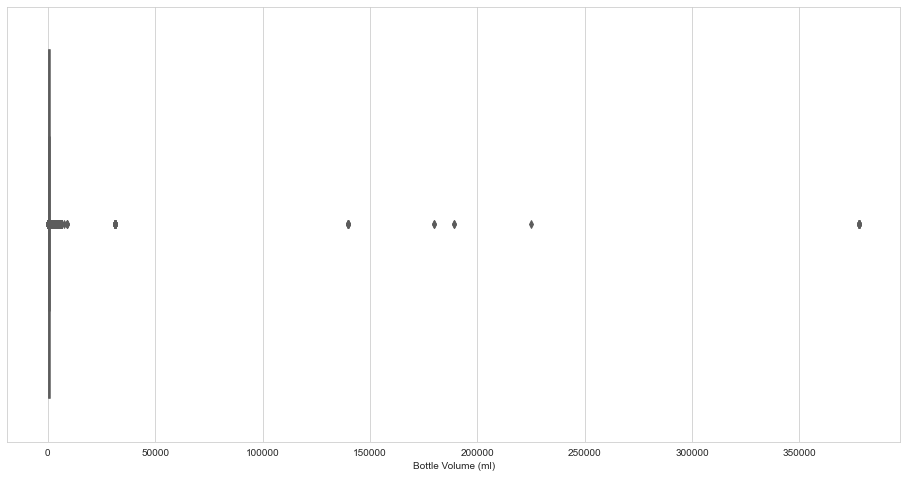

In [17]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.boxplot(x=data['Bottle Volume (ml)'],palette=sns.color_palette("hls", 8))

In [18]:
#replace the outlier 
#if larger than 3 standard deviation, replace it as mean + 3 standard deviation
#if smaller than 3 standard deviation, replace it as mean - 3 standard deviation
def replace_outlier(val, mean, std):
    if val>mean+3*std:
        return mean+3*std
    elif val<mean-3*std:
        return mean-3*std
    return val

for col in numeric_col:
    mean=data[col].mean()
    std_dev=data[col].std(axis=0)
    data[col]=data[col].map(lambda x:replace_outlier(x, mean,std_dev))

<AxesSubplot:>

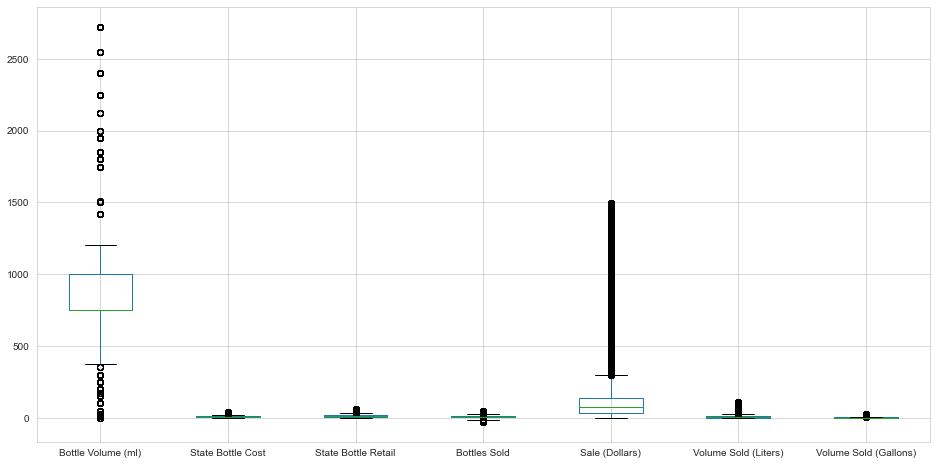

In [19]:
plt.figure(figsize=(16,8))
data.boxplot(numeric_col)

## Choose the county we will locate

In [20]:
#stores:sorted by total sales
total_sales_in_each_store=data.groupby(['County Number','Store Number'],as_index=False).agg({'Sale (Dollars)':'sum'}).sort_values(by='Sale (Dollars)',ascending=False)
total_sales_in_each_store

#top 10 counties sorted by store level average total sales
top_10_avg_totalsales_counties=total_sales_in_each_store.groupby('County Number',as_index=False).agg({'Sale (Dollars)':'mean'}).rename(columns={'Sale (Dollars)': 'Avg_total_sales'}).sort_values(by='Avg_total_sales',ascending=False).head(10)
top_10_avg_totalsales_counties

,County Number,Avg_total_sales
29,30.0,1.534478e+06
76,77.0,1.498727e+06
16,17.0,1.448707e+06
81,82.0,1.427261e+06
96,97.0,1.407317e+06
51,52.0,1.383221e+06
56,57.0,1.187605e+06
84,85.0,1.116319e+06
50,51.0,1.094525e+06
77,78.0,1.073742e+06


In [21]:
top_10_avg_totalsales_counties['County Number']=top_10_avg_totalsales_counties['County Number'].replace({30: 'dickinson',77: 'polk',17: 'cerro gordo',82: 'scott',97: 'woodbury',52: 'johnson',57: 'linn',85: 'story',51: 'jefferson',78: 'pottawattamie'})
top_10_avg_totalsales_counties=top_10_avg_totalsales_counties.rename(columns={'County Number': 'County Name'})

In [22]:
#top_10_avg_totalsales_counties['County Number'].replace({30: 'dickinson',77: 'polk',17: 'cerro gordo',82: 'scott',97: 'woodbury',52: 'johnson',57: 'linn',85: 'story',51: 'jefferson',78: 'pottawattamie'})

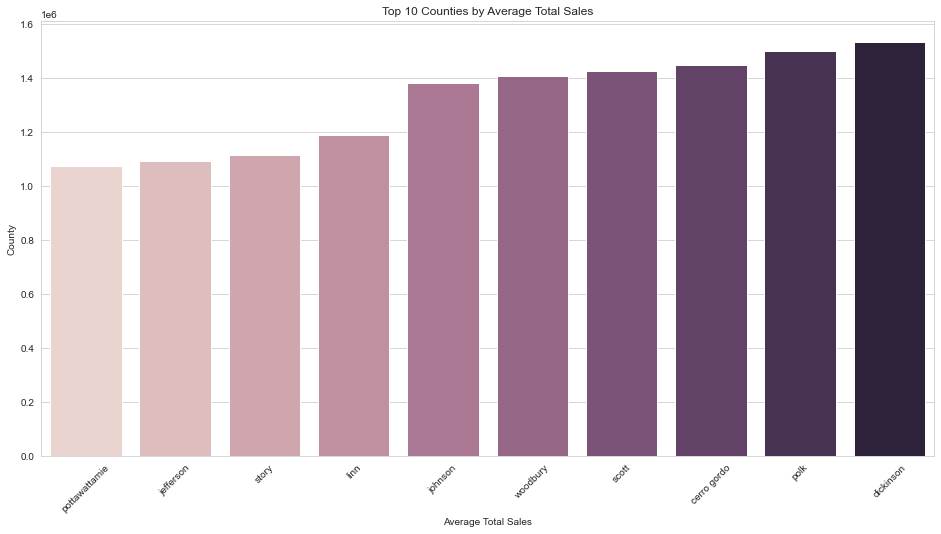

In [23]:
#plot top 10 counties by Average Total Sales
plt.figure(figsize=(16,8))

top_10_avg_totalsales_counties2=top_10_avg_totalsales_counties.sort_values(by='Avg_total_sales')
sns.barplot(x=top_10_avg_totalsales_counties2["County Name"], y=top_10_avg_totalsales_counties2["Avg_total_sales"],palette = sns.cubehelix_palette(len(top_10_avg_totalsales_counties2["Avg_total_sales"])))
plt.xticks(rotation= 45)
plt.xlabel('Average Total Sales')
plt.ylabel('County')
plt.title("Top 10 Counties by Average Total Sales")
plt.show()

In [24]:
#find the number of stores in the counties  30,17,51
number_of_stores_in_county=data.groupby('County Number')['Store Number'].nunique()
number_of_stores_in_county=number_of_stores_in_county.to_frame().rename(columns={"Store Number":'No_of_stores'}).sort_values(by='No_of_stores',ascending=False).head(10)
number_of_stores_in_county=number_of_stores_in_county.reset_index()


In [25]:
data.groupby('County Number')['Store Number'].nunique().to_frame().rename(columns={"Store Number":'No_of_stores'}).sort_values(by='No_of_stores',ascending=False).head(10)

,No_of_stores
County Number,
77.0,326
57.0,168
7.0,144
82.0,115
52.0,96
78.0,77
31.0,72
85.0,63
97.0,57


In [26]:
data[data['County Number']==52]

,Store Number,City,County Number,County,Category,Category Name,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,day
Date,,,,,,,,,,,,,,,,,,,
2012-09,2512,IOWA CITY,52.0,johnson,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35.0,43128,6,1750.0,14.670000,22.000000,12.0,264.000000,21.00,5.55,2012,9,24
2014-08,2512,IOWA CITY,52.0,johnson,1011100.0,BLENDED WHISKIES,297.0,23826,12,750.0,3.460000,5.190000,12.0,62.279999,9.00,2.38,2014,8,25
2014-09,2599,CORALVILLE,52.0,johnson,1081200.0,CREAM LIQUEURS,305.0,73054,6,1750.0,24.340000,36.509998,6.0,219.059998,10.50,2.77,2014,9,15
2012-05,2512,IOWA CITY,52.0,johnson,1031080.0,VODKA 80 PROOF,297.0,35916,12,750.0,3.310000,4.960000,12.0,59.520000,9.00,2.38,2012,5,7
2015-09,3926,IOWA CITY,52.0,johnson,1031100.0,100 PROOF VODKA,260.0,39868,6,1750.0,16.000000,24.000000,3.0,72.000000,5.25,1.39,2015,9,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07,4308,CORALVILLE,52.0,johnson,1031200.0,VODKA FLAVORED,380.0,41692,6,1750.0,7.990000,13.490000,6.0,80.940002,10.50,2.77,2014,7,9
2013-11,2512,IOWA CITY,52.0,johnson,1011100.0,BLENDED WHISKIES,297.0,23826,12,750.0,3.460000,5.190000,12.0,62.279999,9.00,2.38,2013,11,14
2012-06,3980,IOWA CITY,52.0,johnson,1031080.0,VODKA 80 PROOF,297.0,35916,12,750.0,3.310000,4.960000,12.0,59.520000,9.00,2.38,2012,6,25


In [27]:
number_of_stores_in_county["County Number"]=number_of_stores_in_county["County Number"].replace({77: 'polk',57: 'linn',7: 'black hawk',82: 'scott',52: 'johnson',78: 'pottawattamie',31: 'dubuque',85: 'story',97: 'woodbury',70: 'muscatine'})
number_of_stores_in_county["County Number"]
number_of_stores_in_county=number_of_stores_in_county.rename(columns={'County Number': 'County Name'})

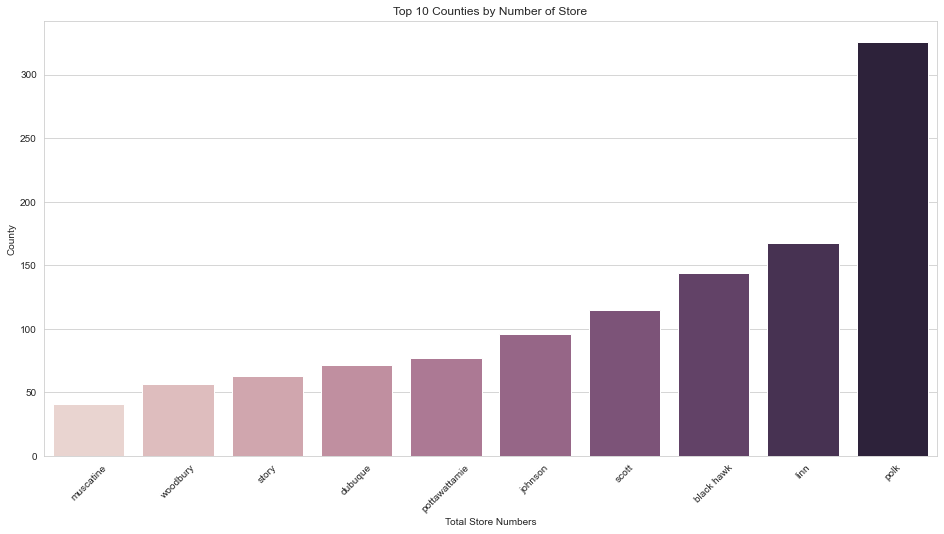

In [28]:
plt.figure(figsize=(16,8))
number_of_stores_in_county2=number_of_stores_in_county.sort_values(by='No_of_stores')
sns.barplot(x=number_of_stores_in_county2["County Name"], y=number_of_stores_in_county2["No_of_stores"],palette = sns.cubehelix_palette(len(number_of_stores_in_county2["No_of_stores"])))
plt.xticks(rotation= 45)
plt.xlabel('Total Store Numbers')
plt.ylabel('County')
plt.title("Top 10 Counties by Number of Store")
plt.show()

In [29]:
top_10_avg_totalsales_counties

,County Name,Avg_total_sales
29,dickinson,1.534478e+06
76,polk,1.498727e+06
16,cerro gordo,1.448707e+06
81,scott,1.427261e+06
96,woodbury,1.407317e+06
51,johnson,1.383221e+06
56,linn,1.187605e+06
84,story,1.116319e+06
50,jefferson,1.094525e+06
77,pottawattamie,1.073742e+06


In [30]:
number_of_stores_in_county

,County Name,No_of_stores
0,polk,326
1,linn,168
2,black hawk,144
3,scott,115
4,johnson,96
5,pottawattamie,77
6,dubuque,72
7,story,63
8,woodbury,57
9,muscatine,41


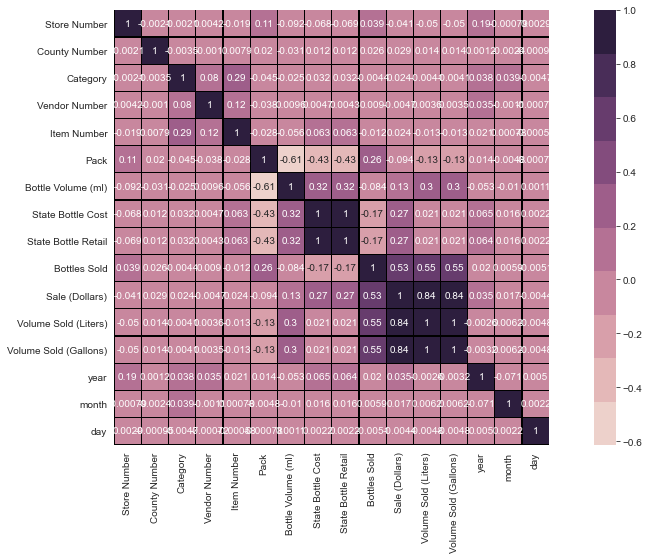

In [31]:
# the correlation graph
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(method='pearson'), linewidths=0.25,vmax=1.0, square=True, cmap=sns.cubehelix_palette(len(number_of_stores_in_county2["No_of_stores"])), linecolor='k', annot=True)
plt.show()

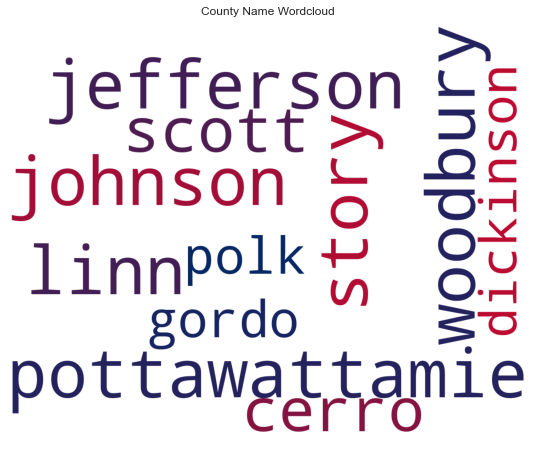

In [32]:
#Ref https://www.kaggle.com/code/artgor/eda-feature-engineering-and-xgb-lgb/notebook
#wordcloud for the top 10 total sales
from wordcloud import WordCloud
data3=top_10_avg_totalsales_counties2.copy()
data3=data3.reset_index()
#convert to the string types and then remove the duplicated values
text=' '.join(data3['County Name'].astype('string').str.lower().drop_duplicates(inplace=False)).lower()

#Ref https://mubaris.com/posts/dataviz-wordcloud/
#https://medium.com/swlh/masking-with-wordcloud-in-python-500-most-frequently-used-words-in-german-c0e865e911bb

from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000,colormap=cmap).generate(text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.title('County Name Wordcloud')
plt.axis("off")
plt.show()

In [33]:
data3

,index,County Name,Avg_total_sales
0,77,pottawattamie,1.073742e+06
1,50,jefferson,1.094525e+06
2,84,story,1.116319e+06
3,56,linn,1.187605e+06
4,51,johnson,1.383221e+06
5,96,woodbury,1.407317e+06
6,81,scott,1.427261e+06
7,16,cerro gordo,1.448707e+06
8,76,polk,1.498727e+06
9,29,dickinson,1.534478e+06


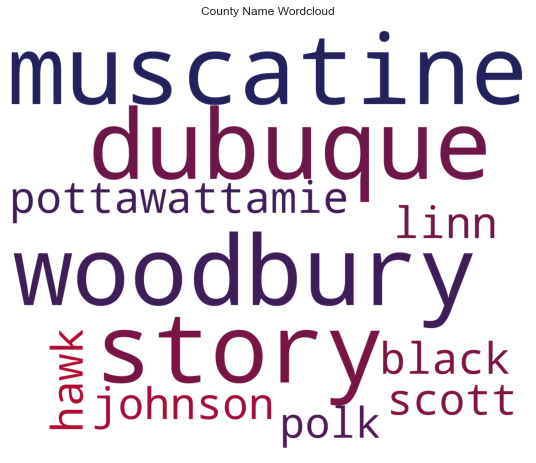

In [34]:
#Ref https://www.kaggle.com/code/artgor/eda-feature-engineering-and-xgb-lgb/notebook
#wordcloud for the top 10 number of stores
from wordcloud import WordCloud
data4=number_of_stores_in_county2.copy()
data4=data4.reset_index()
#convert to the string types and then remove the duplicated values
text=' '.join(data4['County Name'].astype('string').str.lower().drop_duplicates(inplace=False)).lower()

#Ref https://mubaris.com/posts/dataviz-wordcloud/
#https://medium.com/swlh/masking-with-wordcloud-in-python-500-most-frequently-used-words-in-german-c0e865e911bb

from matplotlib.colors import LinearSegmentedColormap
colors = ["#BF0A30", "#002868"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000,colormap=cmap).generate(text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.title('County Name Wordcloud')
plt.axis("off")
plt.show()

## Choose the items we will sell

In [35]:
#find the top sales items in the county we choose 
#in dickinson
dickinson_info=data[data['County Number']==30]
dickinson_info
top_items_dickinson=dickinson_info.groupby('Item Number',as_index=False).agg({'Sale (Dollars)':'sum'}).rename(columns={'Sale (Dollars)': 'item_total_sales'}).sort_values(by='item_total_sales',ascending=False).head(10)
top_items_dickinson

,Item Number,item_total_sales
2015,43337,1.156987e+06
411,11788,8.486180e+05
388,11297,7.641318e+05
827,26827,6.292292e+05
1605,38177,5.505836e+05
2562,64867,4.823116e+05
1322,35317,4.343693e+05
1606,38178,4.052934e+05
1247,34422,4.000991e+05
1913,42717,3.999425e+05


In [36]:
top_items_dickinson['Item Number']=top_items_dickinson['Item Number'].replace({43337: 'Captain Morgan Spiced Rum',11788: 'Black Velvet',11297: 'Crown Royal Canadian Whisky',26827: 'Jack Daniels Old #7 Black Lbl',38177: 'Titos Handmade Vodka',64867: 'Fireball Cinnamon Whiskey',35317: 'Barton Vodka',38178: 'Titos Handmade Vodka',34422: 'Grey Goose Vodka',42717: 'Malibu Coconut Rum'})
top_items_dickinson=top_items_dickinson.rename(columns={'Item Number': 'Item'})

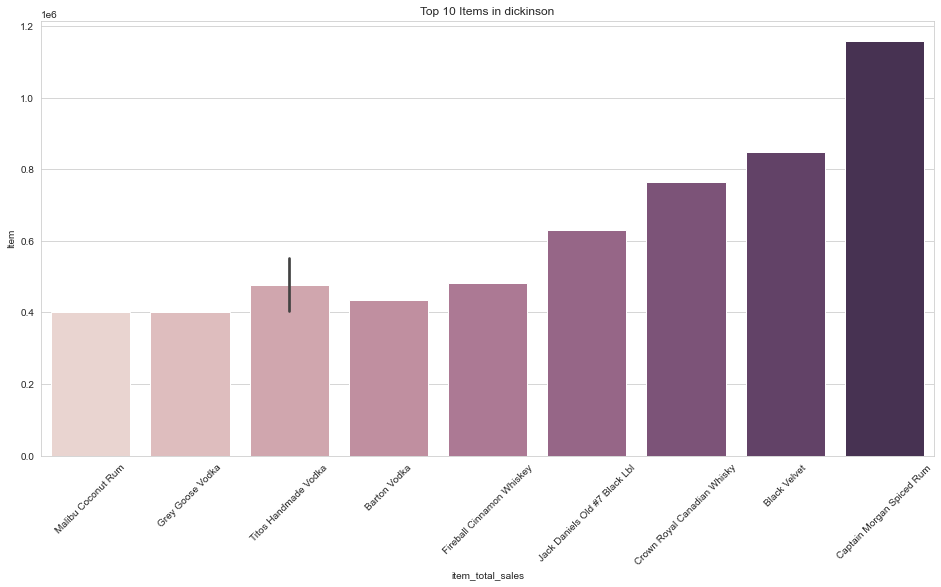

In [37]:
plt.figure(figsize=(16, 8))
top_items_dickinson=top_items_dickinson.sort_values(by='item_total_sales')
sns.barplot(x=top_items_dickinson["Item"], y=top_items_dickinson["item_total_sales"],palette = sns.cubehelix_palette(len(top_10_avg_totalsales_counties2["Avg_total_sales"])))
plt.xticks(rotation= 45)
plt.xlabel('item_total_sales')
plt.ylabel('Item')
plt.title("Top 10 Items in dickinson")
plt.show()

In [38]:
top_items_dickinson

,Item,item_total_sales
1913,Malibu Coconut Rum,3.999425e+05
1247,Grey Goose Vodka,4.000991e+05
1606,Titos Handmade Vodka,4.052934e+05
1322,Barton Vodka,4.343693e+05
2562,Fireball Cinnamon Whiskey,4.823116e+05
1605,Titos Handmade Vodka,5.505836e+05
827,Jack Daniels Old #7 Black Lbl,6.292292e+05
388,Crown Royal Canadian Whisky,7.641318e+05
411,Black Velvet,8.486180e+05
2015,Captain Morgan Spiced Rum,1.156987e+06


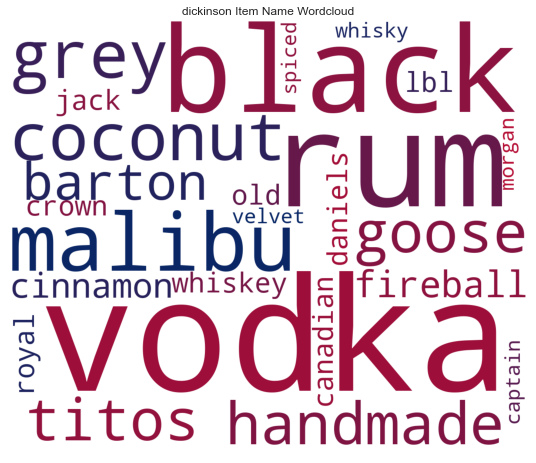

In [39]:
data11=top_items_dickinson.copy()
data11=data11.reset_index()

text1=' '.join(data11['Item'].astype('string').str.lower().drop_duplicates(inplace=False)).lower()

from matplotlib.colors import LinearSegmentedColormap

wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000,colormap=cmap).generate(text1)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.title('dickinson Item Name Wordcloud')
plt.axis("off")
plt.show()

In [40]:
#in jefferson
jefferson_info=data[data['County Number']==51]
jefferson_info
top_items_jefferson=jefferson_info.groupby('Item Number',as_index=False).agg({'Sale (Dollars)':'sum'}).rename(columns={'Sale (Dollars)': 'item_total_sales'}).sort_values(by='item_total_sales',ascending=False).head(10)
top_items_jefferson

,Item Number,item_total_sales
280,11788,169799.612408
892,36308,133453.199194
549,26826,113517.410946
571,27102,106417.952438
997,38176,106380.304249
1266,43336,105691.660667
260,11296,97752.992420
1268,43338,86627.815979
1587,64866,85390.541850
327,15626,82093.826744


In [41]:
top_items_jefferson['Item Number']=top_items_jefferson['Item Number'].replace({11788: 'Black Velvet',36308: 'Hawkeye Vodka',26826: 'Jack Daniels Old #7 Black Lbl',27102: 'Templeton Rye',38176: 'Titos Vodka',43336: 'Captain Morgan Original Spiced',11296: 'Crown Royal',43338: 'Captain Morgan Spiced Rum',64866: 'Fireball Cinnamon Whiskey',15626: 'Jameson'})
top_items_jefferson=top_items_jefferson.rename(columns={'Item Number': 'Item'})

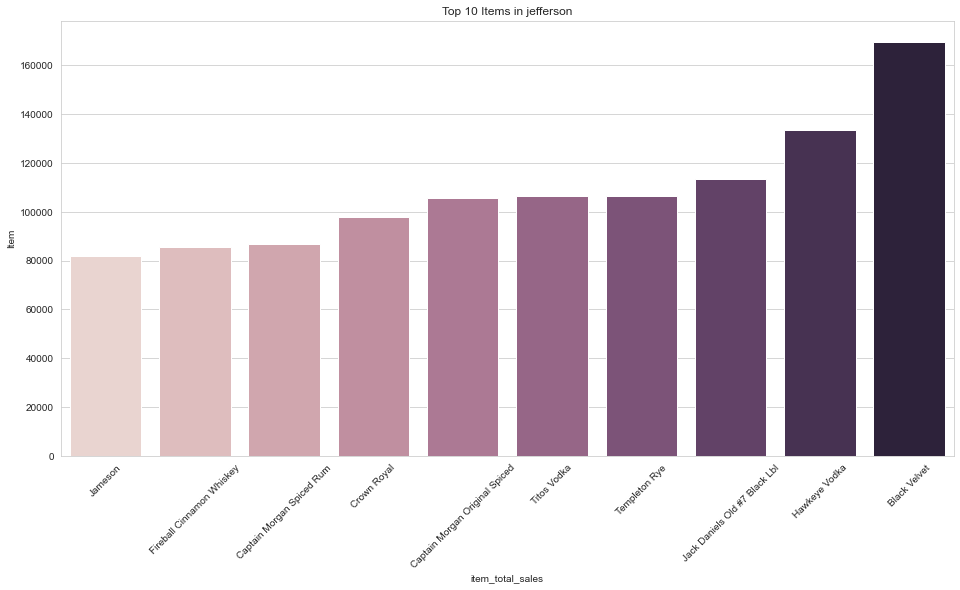

In [42]:
plt.figure(figsize=(16, 8))
top_items_jefferson=top_items_jefferson.sort_values(by='item_total_sales')
sns.barplot(x=top_items_jefferson["Item"], y=top_items_jefferson["item_total_sales"],palette = sns.cubehelix_palette(len(top_10_avg_totalsales_counties2["Avg_total_sales"])))
plt.xticks(rotation= 45)
plt.xlabel('item_total_sales')
plt.ylabel('Item')
plt.title("Top 10 Items in jefferson")
plt.show()

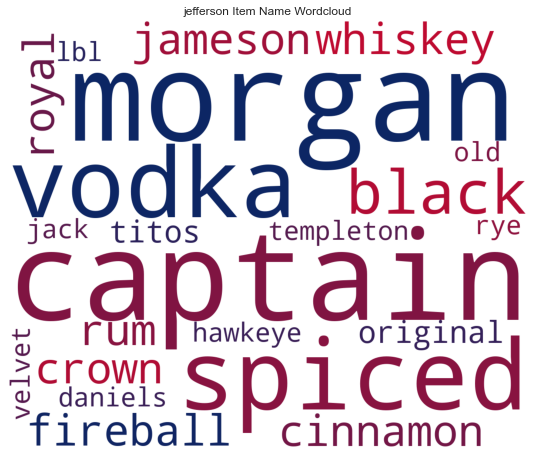

In [43]:
data12=top_items_jefferson.copy()
data12=data12.reset_index()

text2=' '.join(data12['Item'].astype('string').str.lower().drop_duplicates(inplace=False)).lower()


wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000,colormap=cmap).generate(text2)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.title('jefferson Item Name Wordcloud')
plt.axis("off")
plt.show()

In [44]:
top_items_jefferson.sort_values('item_total_sales',ascending=False)

,Item,item_total_sales
280,Black Velvet,169799.612408
892,Hawkeye Vodka,133453.199194
549,Jack Daniels Old #7 Black Lbl,113517.410946
571,Templeton Rye,106417.952438
997,Titos Vodka,106380.304249
1266,Captain Morgan Original Spiced,105691.660667
260,Crown Royal,97752.992420
1268,Captain Morgan Spiced Rum,86627.815979
1587,Fireball Cinnamon Whiskey,85390.541850
327,Jameson,82093.826744


In [45]:
#in cerro gordo

CerroGordo_info=data[data['County Number']==17]
CerroGordo_info
top_items_CerroGordo=CerroGordo_info.groupby('Item Number',as_index=False).agg({'Sale (Dollars)':'sum'}).rename(columns={'Sale (Dollars)': 'item_total_sales'}).sort_values(by='item_total_sales',ascending=False).head(10)
top_items_CerroGordo

,Item Number,item_total_sales
488,11788,1.109310e+06
2226,43337,8.487535e+05
1563,36308,7.559099e+05
2821,64858,6.424217e+05
466,11297,6.302673e+05
934,26827,5.277277e+05
136,1799,4.580996e+05
1315,34007,4.524027e+05
1757,38178,4.105145e+05
486,11777,4.078614e+05


In [46]:
top_items_CerroGordo['Item Number']=top_items_CerroGordo['Item Number'].replace({11788: 'Black Velvet',43337: 'Captain Morgan Spiced Rum',36308: 'Hawkeye Vodka',64858: 'Fireball Cinnamon Whiskey Mini Dispenser',11297: 'Crown Royal Canadian Whisky',26827: 'Jack Daniels Old #7 Black Lbl',1799: 'Captain Morgan Spiced Barrel',34007: 'Absolut Swedish Vodka 80 Prf',38178: 'Titos Handmade Vodka',11777: 'Black Velvet'})
top_items_CerroGordo=top_items_CerroGordo.rename(columns={'Item Number': 'Item'})

In [47]:
top_items_CerroGordo

,Item,item_total_sales
488,Black Velvet,1.109310e+06
2226,Captain Morgan Spiced Rum,8.487535e+05
1563,Hawkeye Vodka,7.559099e+05
2821,Fireball Cinnamon Whiskey Mini Dispenser,6.424217e+05
466,Crown Royal Canadian Whisky,6.302673e+05
934,Jack Daniels Old #7 Black Lbl,5.277277e+05
136,Captain Morgan Spiced Barrel,4.580996e+05
1315,Absolut Swedish Vodka 80 Prf,4.524027e+05
1757,Titos Handmade Vodka,4.105145e+05
486,Black Velvet,4.078614e+05


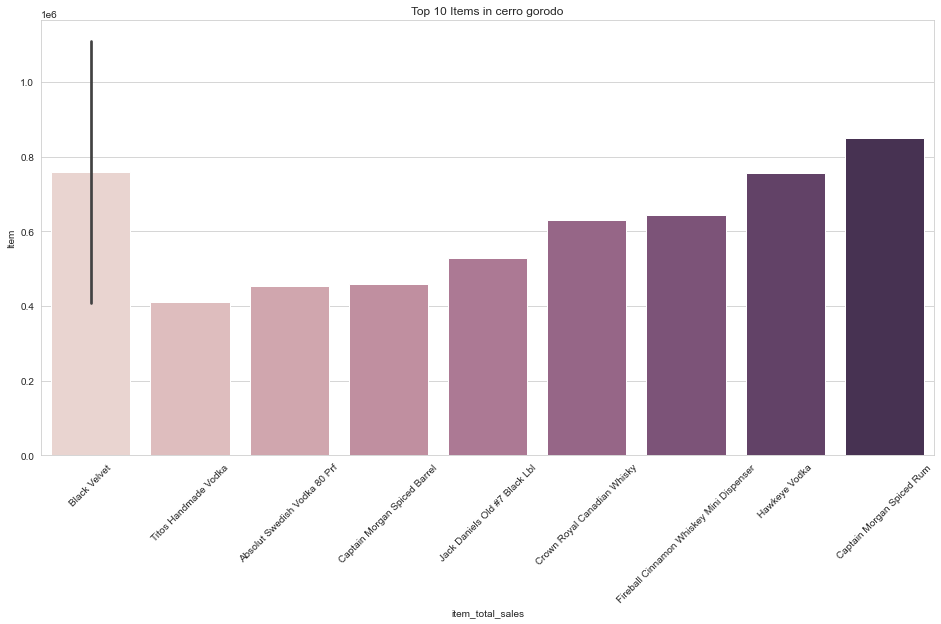

In [48]:
plt.figure(figsize=(16, 8))
top_items_CerroGordo=top_items_CerroGordo.sort_values(by='item_total_sales')
sns.barplot(x=top_items_CerroGordo["Item"], y=top_items_CerroGordo["item_total_sales"],palette = sns.cubehelix_palette(len(top_10_avg_totalsales_counties2["Avg_total_sales"])))
plt.xticks(rotation= 45)
plt.xlabel('item_total_sales')
plt.ylabel('Item')
plt.title("Top 10 Items in cerro gorodo")
plt.show()

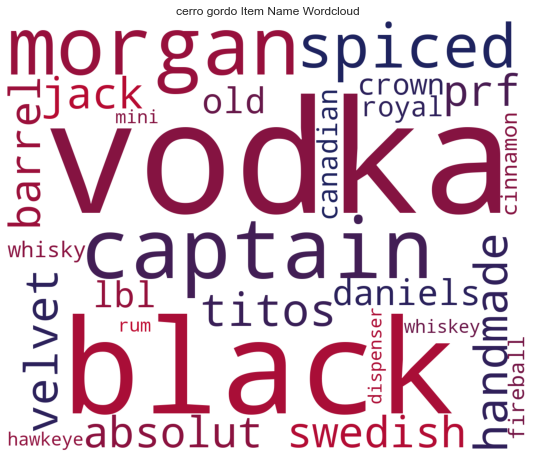

In [49]:
data13=top_items_CerroGordo.copy()
data13=data13.reset_index()

text3=' '.join(data13['Item'].astype('string').str.lower().drop_duplicates(inplace=False)).lower()


wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000,colormap=cmap).generate(text3)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.title('cerro gordo Item Name Wordcloud')
plt.axis("off")
plt.show()

In [50]:
# the new training data
#number dickinson,jefferson,cerro gordo
#select those items donot coexist in top 10 average sales and the  numbers
data2=data[(data['County Number']==30)|(data['County Number']==51)|(data['County Number']==17)]

In [51]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 745597 entries, 2012-04 to 2012-12
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Store Number           745597 non-null  int32  
 1   City                   745597 non-null  object 
 2   County Number          745597 non-null  float32
 3   County                 745597 non-null  string 
 4   Category               745597 non-null  float32
 5   Category Name          745597 non-null  object 
 6   Vendor Number          745597 non-null  float32
 7   Item Number            745597 non-null  int32  
 8   Pack                   745597 non-null  int8   
 9   Bottle Volume (ml)     745597 non-null  float64
 10  State Bottle Cost      745597 non-null  float64
 11  State Bottle Retail    745597 non-null  float64
 12  Bottles Sold           745597 non-null  float64
 13  Sale (Dollars)         745597 non-null  float64
 14  Volume Sold (Liters)   745597 non-

In [52]:
data2=data2.drop(labels=["City","County","Category Name","Volume Sold (Gallons)"], axis="columns")

In [53]:
plt.figure(figsize=(16,8))
data7=data2.copy()
e=data7.reset_index().groupby(["Date","County Number"],as_index=False).agg({'Sale (Dollars)':'sum'})
e=e.set_index('Date')
e

#plt.plot(e["Date"],e["Sale (Dollars)"])

,County Number,Sale (Dollars)
Date,,
2012-01,17.0,304521.726057
2012-01,30.0,261918.418025
2012-01,51.0,37418.637916
2012-02,17.0,331637.323537
2012-02,30.0,151340.726001
...,...,...
2020-08,30.0,526322.524659
2020-08,51.0,93572.733999
2020-09,17.0,594225.765096


<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Past 2 years total sales trends for the county')

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

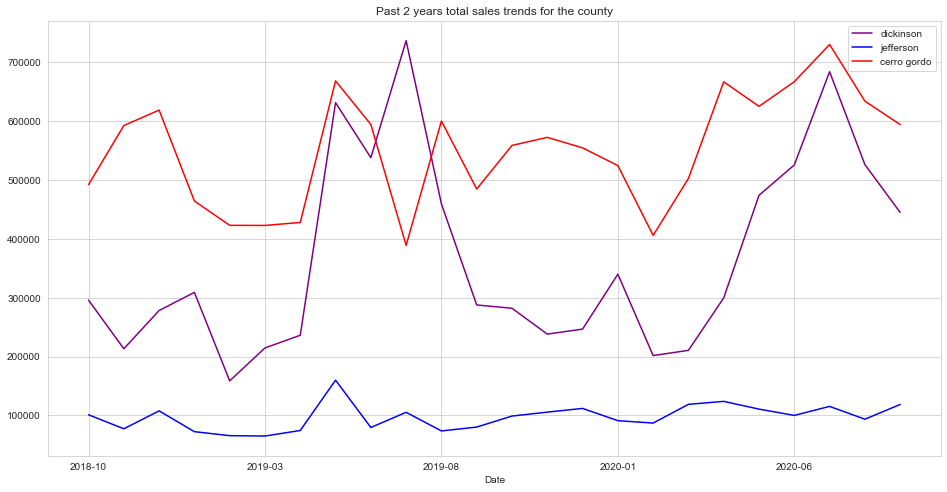

In [54]:
# for the past 2 years for dickinson
county_number_30=e[e["County Number"]==30]
county_number_30=county_number_30
county_number_30_tail24=county_number_30.tail(24)

plt.figure(figsize=(16,8))

# for the past 2 years for jefferson
county_number_51=e[e["County Number"]==51]
county_number_51
county_number_51_tail24=county_number_51.tail(24)

plt.figure(figsize=(16,8))

# for the past 2 years for cerro gordo
county_number_17=e[e["County Number"]==17]
county_number_17
county_number_17_tail24=county_number_17.tail(24)

plt.figure(figsize=(16,8))

county_number_30_tail24["Sale (Dollars)"].plot(c='purple',label="dickinson")
county_number_51_tail24["Sale (Dollars)"].plot(c='blue',label="jefferson")
county_number_17_tail24["Sale (Dollars)"].plot(c='red',label="cerro gordo")

plt.legend()
plt.title("Past 2 years total sales trends for the county")

Text(0.5, 1.0, 'Past 2 years total sales trends for the county')

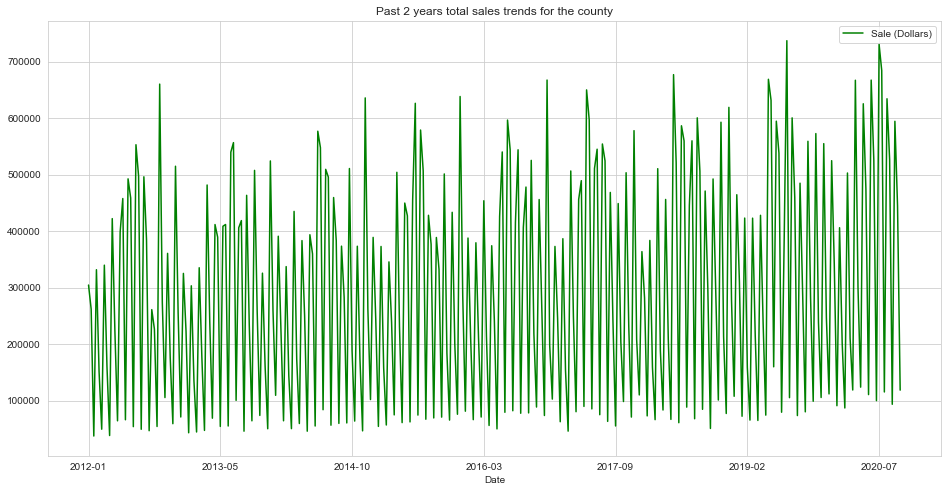

In [55]:
# for the total sales we selected
plt.figure(figsize=(16,8))
e["Sale (Dollars)"].plot(c='green')

plt.legend()
plt.title("Past 2 years total sales trends for the county")

In [56]:
## for the items selected
g=data7.reset_index().groupby(["Store Number","Item Number"],as_index=False).agg({'Sale (Dollars)':'sum'})
g

,Store Number,Item Number,Sale (Dollars)
0,2152,647,32.980000
1,2152,680,44.959999
2,2152,3136,235.040001
3,2152,3310,36.160000
4,2152,4001,78.700001
...,...,...,...
42581,5997,87509,40.320000
42582,5997,89191,207.000000
42583,5997,89196,99.660004
42584,5997,89199,49.500000


## Market Trend

In [57]:
data.head()
data31=data.copy()
data31=data31.reset_index()
market_trend=data31.groupby(['Date'],as_index=False).agg({'Sale (Dollars)':'sum'}).sort_values(by='Sale (Dollars)',ascending=False)

market_trend

,Date,Sale (Dollars)
99,2020-06,3.261480e+07
93,2019-12,3.063335e+07
100,2020-07,3.025108e+07
102,2020-09,3.011187e+07
101,2020-08,2.967544e+07
...,...,...
1,2012-02,1.664253e+07
22,2013-11,1.645862e+07
13,2013-02,1.628350e+07
8,2012-09,1.611833e+07


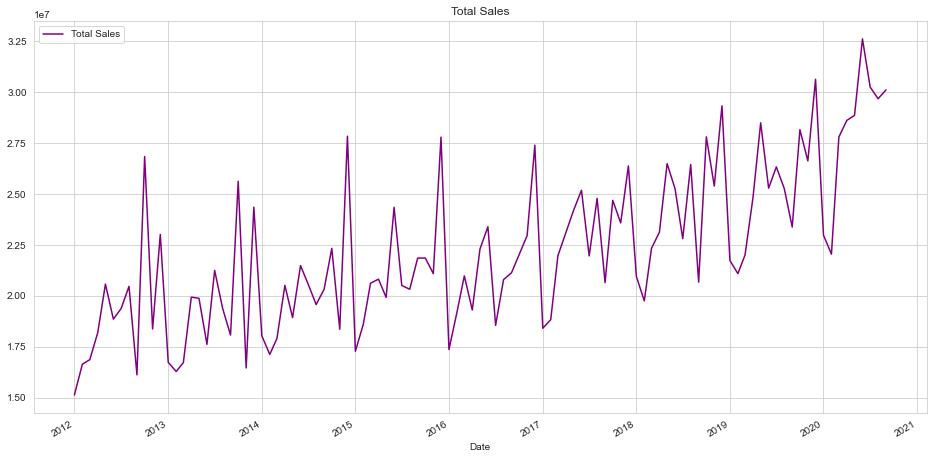

In [58]:
market_trend['Date']=pd.to_datetime(market_trend['Date'])
market_trend=market_trend.set_index('Date')        
market_trend   

plt.figure(figsize=(16,8))
market_trend['Sale (Dollars)'].plot(c='purple',label="Total Sales")
plt.title("Total Sales")
plt.legend()

## ARIMA Model

In [59]:
data2.head()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),year,month,day
Date,,,,,,,,,,,,,,,
2012-04,4104,17.0,1062310.0,260.0,43337,12,1000.0,10.99,16.490000,12.0,197.880005,12.0,2012,4,2
2013-11,4576,30.0,1081700.0,384.0,76036,6,750.0,10.42,15.630000,6.0,93.779999,4.5,2013,11,5
2015-11,3390,30.0,1071100.0,395.0,58868,6,1750.0,8.20,12.300000,6.0,73.800003,10.5,2015,11,3
2012-06,2652,17.0,1022100.0,395.0,89198,6,1750.0,20.25,30.370001,6.0,182.220001,10.5,2012,6,11
2013-11,3713,17.0,1062310.0,35.0,43205,12,750.0,7.74,11.610000,12.0,139.320007,9.0,2013,11,22


In [60]:
data29=data2.copy()
data29=data29.reset_index()
data_arima=data29.groupby(["Date"],as_index=False).agg({'Sale (Dollars)':'sum'})
data_arima['Date']=pd.to_datetime(data_arima['Date']).dt.to_period('m')
data_arima=data_arima.set_index('Date')
data_arima

train= data_arima[: int(0.75*len(data_arima))]
test= data_arima[int(0.75*len(data_arima)):]

In [61]:
data_arima["Sale (Dollars)"]=round(data_arima["Sale (Dollars)"],2)

In [62]:
data_arima.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 103 entries, 2012-01 to 2020-09
Freq: M
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sale (Dollars)  103 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [63]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

<Figure size 1152x576 with 0 Axes>

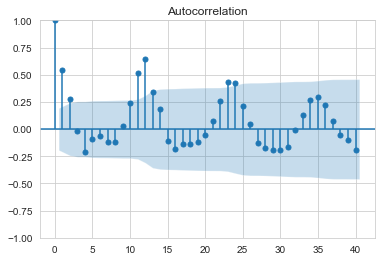

In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
plt.figure(figsize=(16,8))
title = 'Autocorrelation'
lags = 40
plot_acf(data_arima['Sale (Dollars)'],title=title,lags=lags);

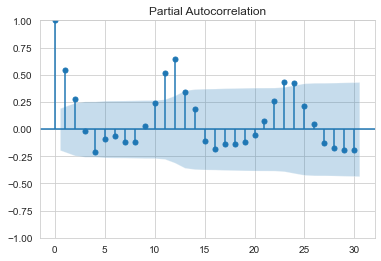

<Figure size 1152x576 with 0 Axes>

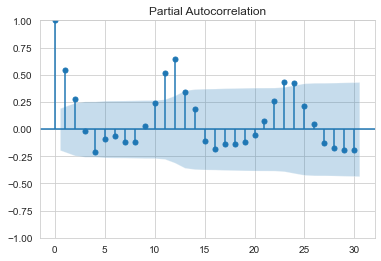

In [65]:
#partial autocorrelation graph
plt.figure(figsize=(16,8))
title = 'Partial Autocorrelation'
lags = 30
plot_acf(data_arima['Sale (Dollars)'],title=title,lags=lags)

In [66]:
#use auto_arima to determine the values first and p and q values first
from pmdarima import auto_arima 
model=pm.auto_arima(data_arima['Sale (Dollars)'], start_p=0, start_q=0,
                      test='adf',       
                      max_p=3, max_q=3, 
                      m=12,              
                      d=None,           
                      seasonal=False,   
                      start_P=0,
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

auto_arima(data_arima['Sale (Dollars)']).summary()

C:\ProgramData\Anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3120.709, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2827.945, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3056.756, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2824.876, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2826.861, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2811.559, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2824.482, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2813.482, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2811.998, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2815.945, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2818.025, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2806.851, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2805.182, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2813.116, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  103
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1378.107
Date:                Wed, 04 May 2022   AIC                           2770.213
Time:                        11:17:55   BIC                           2788.588
Sample:                             0   HQIC                          2777.654
                                - 103                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4789.2996   2668.246      1.795      0.073    -440.366       1e+04
ar.L1          0.5891      0.165      3.560      0.000       0.265       0.913
ar.L2         -0.5534      0.180     -3.076      0.002      -0.906      -0.201
ma.L1         -1.1361      0.165     -6.873      0.000      -1.460      -0.812
ma.L2          0.9104      0.194      4.697      0.000       0.531       1.290
ma.L3         -0.7452      0.143     -5.214      0.000      -1.025      -0.465
sigma2       3.48e+10      0.000   1.21e+14      0.000    3.48e+10    3.48e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 5.92
Prob(Q):                              0.52   Prob(JB):                         0.05
Heteroskedasticity (H):               0.87   Skew:                             0.56
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.9e+29. Standard errors may be unstable.
"""

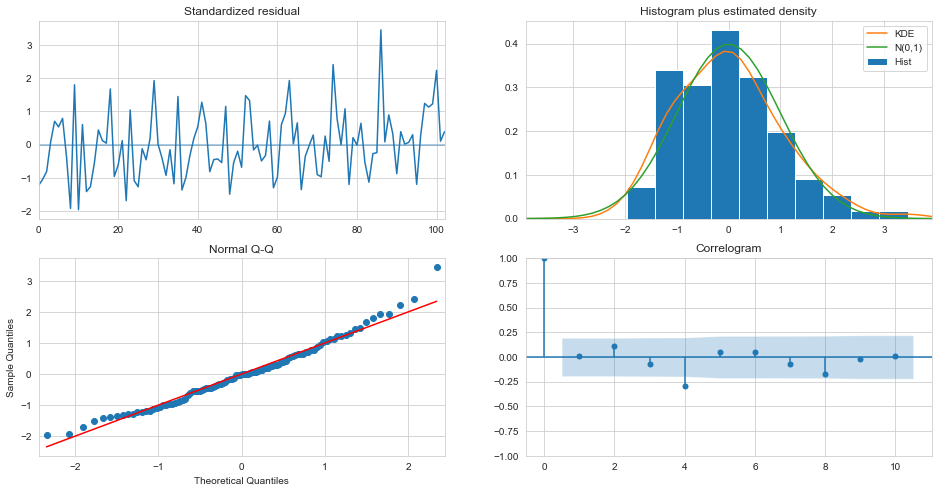

In [67]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [68]:
import statsmodels.api as smapi
arima_model=smapi.tsa.arima.ARIMA(train, order=(2,1,3))
fitted = arima_model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [69]:
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:         Sale (Dollars)   No. Observations:                   77
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1027.589
Date:                Wed, 04 May 2022   AIC                           2067.178
Time:                        11:17:56   BIC                           2081.163
Sample:                    01-31-2012   HQIC                          2072.767
                         - 07-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4689      0.143      3.281      0.001       0.189       0.749
ar.L2         -0.4459      0.194     -2.298      0.022      -0.826      -0.066
ma.L1         -0.9441      0.128     -7.390      0.0

Text(0.5, 1.0, 'Actual vs Predicted Values')

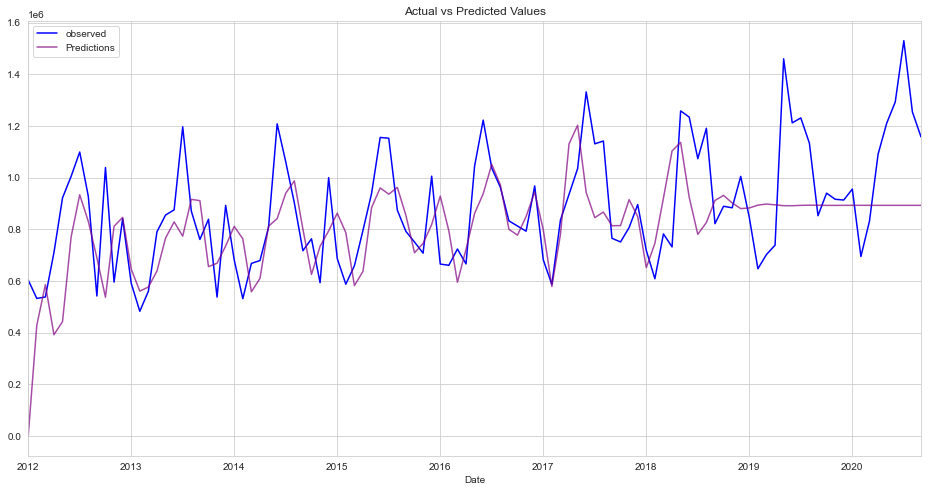

In [70]:
## get the prediction values
arima_predictions=fitted.get_prediction(dynamic=False,end=pd.to_datetime('2020-09-01'))
arima_ci = arima_predictions.conf_int()
lower_series = pd.Series(arima_ci["lower Sale (Dollars)"])
upper_series = pd.Series(arima_ci["upper Sale (Dollars)"])

plt.figure(figsize=(16,8))
ax=data_arima['Sale (Dollars)'].plot(label="observed",c="blue")
arima_predictions.predicted_mean.plot(ax=ax,label='Predictions', alpha=.7,c="purple")
plt.legend()
plt.title("Actual vs Predicted Values")

In [71]:
#Ref https://stackoverflow.com/questions/70688363/using-statsmodel-and-the-arima-model-to-forecast-but-running-into-issues
fc= fitted.forecast(len(test), alpha=0.05)
conf = fitted.get_forecast(len(test), alpha=0.05).conf_int()
se = fitted.bse

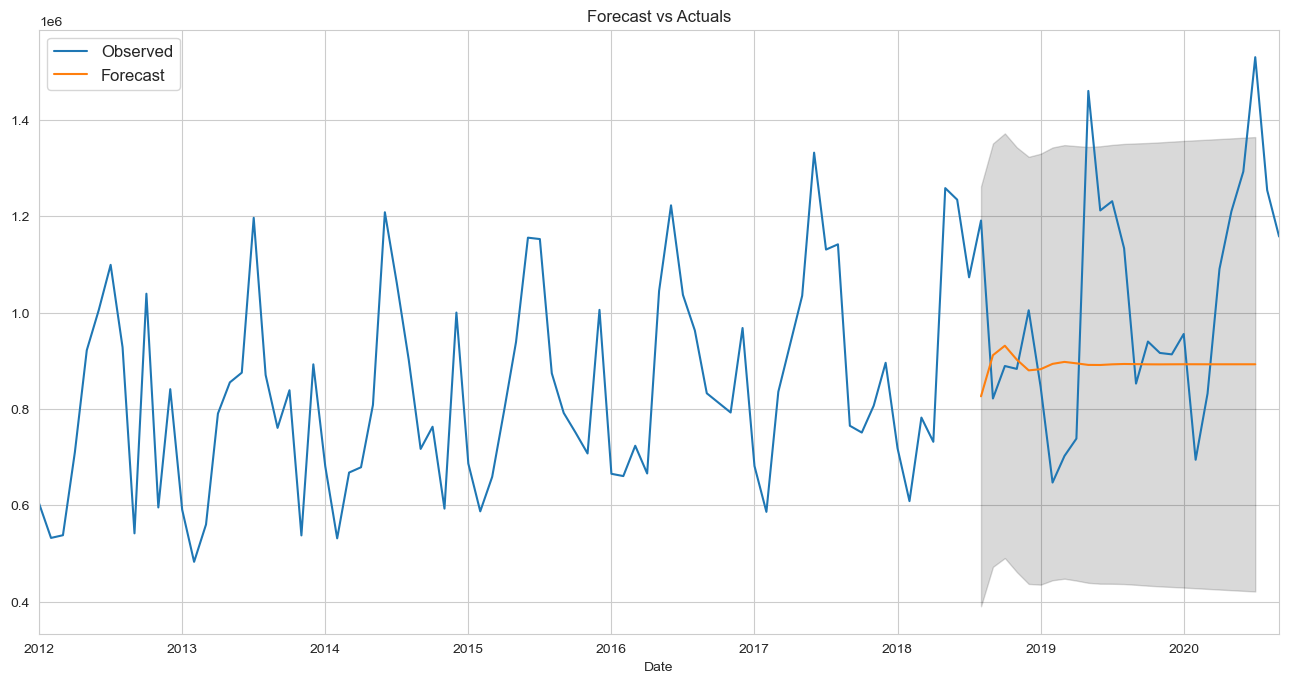

In [72]:
# for the forecast value
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf["lower Sale (Dollars)"], index=test.index)
upper_series = pd.Series(conf["upper Sale (Dollars)"], index=test.index)


plt.figure(figsize=(16,8), dpi=100)
data_arima['Sale (Dollars)'].plot(label="Observed")
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [73]:
#metrics evaluation
print('MAE:', round(metrics.mean_absolute_error(test.values, arima_predictions.predicted_mean.tail(26)),2))
print('MSE:', round(metrics.mean_squared_error(test.values, arima_predictions.predicted_mean.tail(26)),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(test.values, arima_predictions.predicted_mean.tail(26))),2))

MAE: 206712.86
MSE: 70755780463.22
RMSE: 265999.59


In [74]:
data_arima

,Sale (Dollars)
Date,
2012-01,603858.78
2012-02,532478.02
2012-03,538085.02
2012-04,710220.14
2012-05,921941.28
...,...
2020-05,1210043.70
2020-06,1292768.42
2020-07,1529956.41


## SARIMAX

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose                                

In [76]:
#as for the sarimax model,first test for the stationarity for both training and test data set
from statsmodels.tsa.stattools import adfuller
stationarity_train = adfuller(train['Sale (Dollars)'])
stationarity_train[1]

0.8202418783065164

In [77]:
stationarity_test = adfuller(test['Sale (Dollars)'])
stationarity_test[1]

0.09352338044467229

In [78]:
#check for the best model
# the best model is (2,1,5) and seasonal order is (1,0,12)
auto_arima(data_arima['Sale (Dollars)'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  103
Model:             SARIMAX(1, 1, 5)x(1, 0, [], 12)   Log Likelihood               -1361.842
Date:                             Wed, 04 May 2022   AIC                           2739.684
Time:                                     11:18:11   BIC                           2760.684
Sample:                                          0   HQIC                          2748.188
                                             - 103                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2801      0.198      1.416      0.157      -0.108       0.668
ma.L1         -0.9846      0.180     -5.461      0.000      -1.338      -0.631
ma.L2          0.0934      0.130      0.718      0.473      -0.161       0.348
ma.L3         -0.2365      0.135     -1.752      0.080      -0.501       0.028
ma.L4         -0.3730      0.162     -2.303      0.021      -0.691      -0.056
ma.L5          0.5591      0.115      4.854      0.000       0.333       0.785
ar.S.L12       0.5686      0.090      6.301      0.000       0.392       0.746
sigma2      2.168e+10   4.84e-12   4.48e+21      0.000    2.17e+10    2.17e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                12.19
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                             0.62
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+37. Standard errors may be unstable.
"""

In [79]:
import statsmodels.api as sm
sarimax_model = sm.tsa.statespace.SARIMAX(train['Sale (Dollars)'],
                                order = (1,1,5),
                                seasonal_order = (1,0,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

sarimax_results = sarimax_model.fit()
sarimax_results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Sale (Dollars)   No. Observations:                   77
Model:             SARIMAX(1, 1, 5)x(1, 0, [1], 12)   Log Likelihood                -763.260
Date:                              Wed, 04 May 2022   AIC                           1544.521
Time:                                      11:18:12   BIC                           1563.065
Sample:                                  01-31-2012   HQIC                          1551.744
                                       - 07-31-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0175      0.461      0.038      0.970      -0.887       0.922
ma.L1         -0.9945      0.511     -1.947      0.051      -1.995       0.006
ma.L2          0.0704      0.561      0.126      0.900      -1.028       1.169
ma.L3         -0.3866      0.346     -1.116      0.264      -1.065       0.292
ma.L4         -0.2603      0.376     -0.692      0.489      -0.998       0.477
ma.L5          0.5617      0.197      2.858      0.004       0.176       0.947
ar.S.L12       0.5491      0.254      2.164      0.030       0.052       1.047
ma.S.L12       0.0570      0.407      0.140      0.889      -0.742       0.855
sigma2      2.246e+10   3.77e-11   5.95e+20      0.000    2.25e+10    2.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.48   Prob(JB):                         0.66
Heteroskedasticity (H):               2.60   Skew:                             0.22
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.73e+37. Standard errors may be unstable.
"""

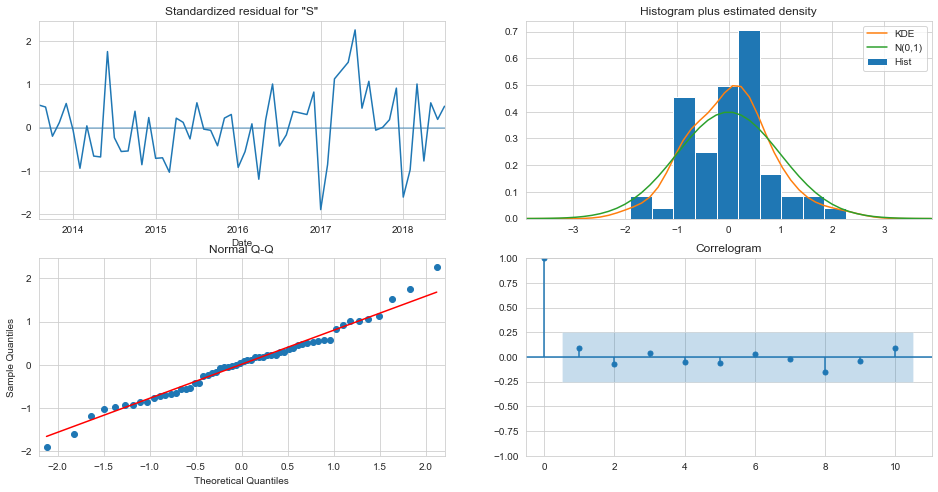

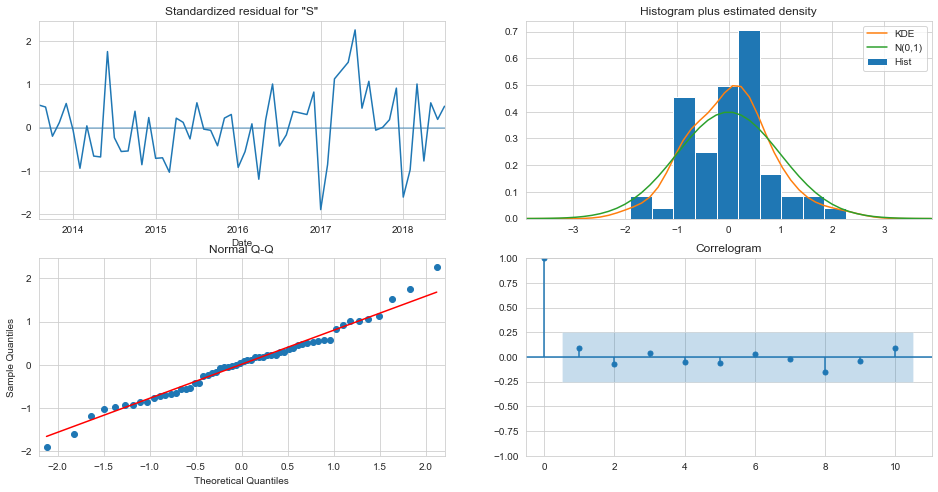

In [80]:
sarimax_results.plot_diagnostics(figsize=(16, 8))

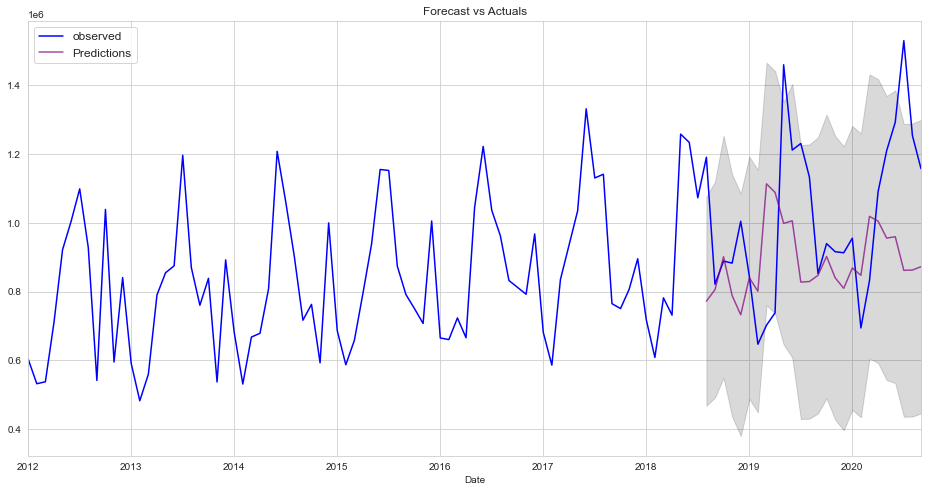

In [81]:
## for the validation parts and the forecast value
sarimax_prediction=sarimax_results.get_prediction(start=pd.to_datetime('2018-08-01'),end=pd.to_datetime('2020-09-01'),dynamic=False)
sarimax_ci = sarimax_prediction.conf_int()
lower_series = pd.Series(sarimax_ci["lower Sale (Dollars)"])
upper_series = pd.Series(sarimax_ci["upper Sale (Dollars)"])

plt.figure(figsize=(16,8))
ax=data_arima['Sale (Dollars)'].plot(label="observed",c="blue")
sarimax_prediction.predicted_mean.plot(ax=ax,label='Predictions', alpha=.7,c="purple")


plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [82]:
#metrics evaluation
print('MAE:', round(metrics.mean_absolute_error(test['Sale (Dollars)'], sarimax_prediction.predicted_mean.tail(26)),2))
print('MSE:', round(metrics.mean_squared_error(test['Sale (Dollars)'], sarimax_prediction.predicted_mean.head(26)),2))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(test['Sale (Dollars)'], sarimax_prediction.predicted_mean.tail(26))),2))

MAE: 221991.9
MSE: 78075356102.92
RMSE: 279419.68


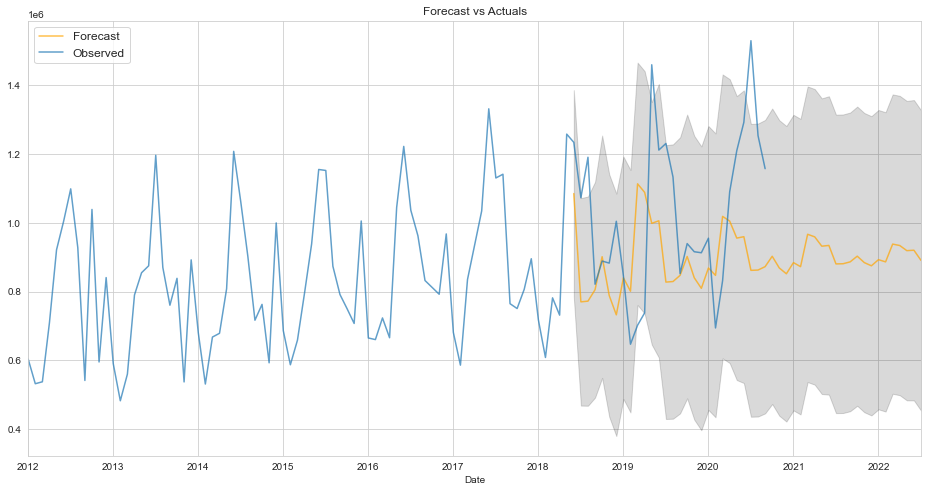

In [83]:
# for the future forecast part
sarimax_futureforecast=sarimax_results.get_forecast(steps=50)
sarimax_ci_forecast = sarimax_futureforecast.conf_int()
lower_series = pd.Series(sarimax_ci_forecast["lower Sale (Dollars)"])
upper_series = pd.Series(sarimax_ci_forecast["upper Sale (Dollars)"])

plt.figure(figsize=(16,8))
sarimax_futureforecast.predicted_mean.plot(label='Forecast', alpha=.7,c="orange")
data_arima['Sale (Dollars)'].plot(label='Observed', alpha=.7)
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()

## FB Prophet Model

In [89]:
import itertools
from fbprophet import Prophet
import holidays

In [90]:
train=train.reset_index()
train = train.rename(columns = {'Sale (Dollars)' : 'y'})
train= train.rename(columns = {'Date' : 'ds'})

test=test.reset_index()
test = test.rename(columns = {'Sale (Dollars)' : 'y'})
test  = test.rename(columns = {'Date' : 'ds'})

In [91]:
train['ds']=train['ds'].astype(str)
train['ds']=pd.to_datetime(train['ds'])

test['ds']=test['ds'].astype(str)
test['ds']=pd.to_datetime(test['ds'])

In [92]:
fb_prophet_model = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 20,
            holidays_prior_scale = 20,
            changepoint_prior_scale = 0.01)

In [93]:
#train the train models
fb_prophet_model.fit(train)

In [94]:
fb_prophet_forecast = fb_prophet_model.make_future_dataframe(periods = 42,freq = "MS")
fb_prophet_forecast

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
114,2021-09-01
115,2021-10-01
116,2021-11-01
117,2021-12-01


In [95]:
fb_prophet_predict=fb_prophet_model.predict(fb_prophet_forecast)
fb_prophet_predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,7.585137e+05,5.477265e+05,6.997141e+05,7.585137e+05,7.585137e+05,-0.179688,-0.179688,-0.179688,-0.008139,-0.008139,-0.008139,-0.171549,-0.171549,-0.171549,0.0,0.0,0.0,6.222182e+05
1,2012-02-01,7.606233e+05,4.747586e+05,6.300977e+05,7.606233e+05,7.606233e+05,-0.274679,-0.274679,-0.274679,0.059908,0.059908,0.059908,-0.334587,-0.334587,-0.334587,0.0,0.0,0.0,5.516963e+05
2,2012-03-01,7.625968e+05,5.396194e+05,6.892768e+05,7.625968e+05,7.625968e+05,-0.195531,-0.195531,-0.195531,-0.004061,-0.004061,-0.004061,-0.191470,-0.191470,-0.191470,0.0,0.0,0.0,6.134851e+05
3,2012-04-01,7.647063e+05,6.159533e+05,7.718091e+05,7.647063e+05,7.647063e+05,-0.097921,-0.097921,-0.097921,-0.008139,-0.008139,-0.008139,-0.089782,-0.089782,-0.089782,0.0,0.0,0.0,6.898254e+05
4,2012-05-01,7.667478e+05,8.483258e+05,1.000281e+06,7.667478e+05,7.667478e+05,0.204336,0.204336,0.204336,0.078777,0.078777,0.078777,0.125559,0.125559,0.125559,0.0,0.0,0.0,9.234217e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,9.989905e+05,8.684655e+05,1.025403e+06,9.989800e+05,9.990003e+05,-0.050931,-0.050931,-0.050931,0.059908,0.059908,0.059908,-0.110839,-0.110839,-0.110839,0.0,0.0,0.0,9.481112e+05
115,2021-10-01,1.001034e+06,8.177179e+05,9.674234e+05,1.001023e+06,1.001044e+06,-0.110700,-0.110700,-0.110700,-0.089602,-0.089602,-0.089602,-0.021098,-0.021098,-0.021098,0.0,0.0,0.0,8.902198e+05
116,2021-11-01,1.003145e+06,8.053987e+05,9.656959e+05,1.003134e+06,1.003156e+06,-0.116702,-0.116702,-0.116702,0.077933,0.077933,0.077933,-0.194635,-0.194635,-0.194635,0.0,0.0,0.0,8.860766e+05
117,2021-12-01,1.005189e+06,1.106382e+06,1.257949e+06,1.005177e+06,1.005200e+06,0.177025,0.177025,0.177025,0.059908,0.059908,0.059908,0.117117,0.117117,0.117117,0.0,0.0,0.0,1.183132e+06


Text(0.5, 1.0, 'Total Sales')

<Figure size 1152x576 with 0 Axes>

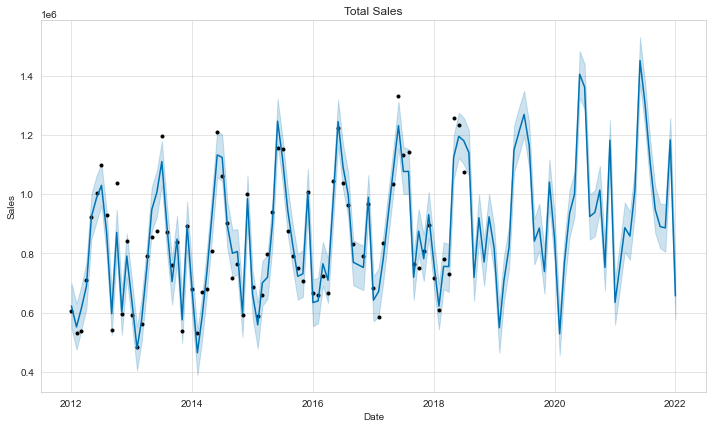

In [96]:
plt.figure(figsize=(16,8))
fb_prophet_model.plot(fb_prophet_predict, xlabel = 'Date', ylabel = 'Sales')
plt.title('Total Sales')

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator



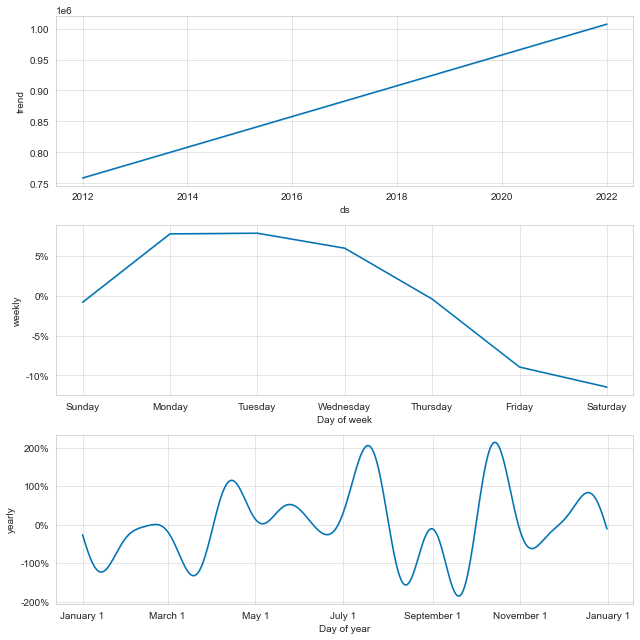

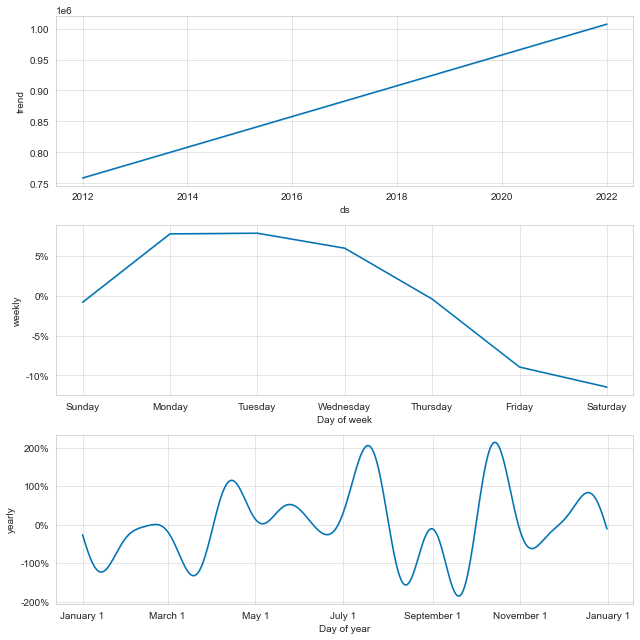

In [97]:
fb_prophet_model.plot_components(fb_prophet_predict)

In [98]:
#plot for the monthly trend

In [99]:
fb_prophet_predict.set_index('ds')['yhat'].tail(13)

ds
2021-01-01    6.345696e+05
2021-02-01    7.642437e+05
2021-03-01    8.868951e+05
2021-04-01    8.584558e+05
2021-05-01    1.012545e+06
2021-06-01    1.450904e+06
2021-07-01    1.306143e+06
2021-08-01    1.109626e+06
2021-09-01    9.481112e+05
2021-10-01    8.902198e+05
2021-11-01    8.860766e+05
2021-12-01    1.183132e+06
2022-01-01    6.564214e+05
Name: yhat, dtype: float64

In [100]:
fb_prophet_predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,7.585137e+05,5.477265e+05,6.997141e+05,7.585137e+05,7.585137e+05,-0.179688,-0.179688,-0.179688,-0.008139,-0.008139,-0.008139,-0.171549,-0.171549,-0.171549,0.0,0.0,0.0,6.222182e+05
1,2012-02-01,7.606233e+05,4.747586e+05,6.300977e+05,7.606233e+05,7.606233e+05,-0.274679,-0.274679,-0.274679,0.059908,0.059908,0.059908,-0.334587,-0.334587,-0.334587,0.0,0.0,0.0,5.516963e+05
2,2012-03-01,7.625968e+05,5.396194e+05,6.892768e+05,7.625968e+05,7.625968e+05,-0.195531,-0.195531,-0.195531,-0.004061,-0.004061,-0.004061,-0.191470,-0.191470,-0.191470,0.0,0.0,0.0,6.134851e+05
3,2012-04-01,7.647063e+05,6.159533e+05,7.718091e+05,7.647063e+05,7.647063e+05,-0.097921,-0.097921,-0.097921,-0.008139,-0.008139,-0.008139,-0.089782,-0.089782,-0.089782,0.0,0.0,0.0,6.898254e+05
4,2012-05-01,7.667478e+05,8.483258e+05,1.000281e+06,7.667478e+05,7.667478e+05,0.204336,0.204336,0.204336,0.078777,0.078777,0.078777,0.125559,0.125559,0.125559,0.0,0.0,0.0,9.234217e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,9.989905e+05,8.684655e+05,1.025403e+06,9.989800e+05,9.990003e+05,-0.050931,-0.050931,-0.050931,0.059908,0.059908,0.059908,-0.110839,-0.110839,-0.110839,0.0,0.0,0.0,9.481112e+05
115,2021-10-01,1.001034e+06,8.177179e+05,9.674234e+05,1.001023e+06,1.001044e+06,-0.110700,-0.110700,-0.110700,-0.089602,-0.089602,-0.089602,-0.021098,-0.021098,-0.021098,0.0,0.0,0.0,8.902198e+05
116,2021-11-01,1.003145e+06,8.053987e+05,9.656959e+05,1.003134e+06,1.003156e+06,-0.116702,-0.116702,-0.116702,0.077933,0.077933,0.077933,-0.194635,-0.194635,-0.194635,0.0,0.0,0.0,8.860766e+05
117,2021-12-01,1.005189e+06,1.106382e+06,1.257949e+06,1.005177e+06,1.005200e+06,0.177025,0.177025,0.177025,0.059908,0.059908,0.059908,0.117117,0.117117,0.117117,0.0,0.0,0.0,1.183132e+06


In [101]:
fb_prophet_predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,7.585137e+05,5.477265e+05,6.997141e+05,7.585137e+05,7.585137e+05,-0.179688,-0.179688,-0.179688,-0.008139,-0.008139,-0.008139,-0.171549,-0.171549,-0.171549,0.0,0.0,0.0,6.222182e+05
1,2012-02-01,7.606233e+05,4.747586e+05,6.300977e+05,7.606233e+05,7.606233e+05,-0.274679,-0.274679,-0.274679,0.059908,0.059908,0.059908,-0.334587,-0.334587,-0.334587,0.0,0.0,0.0,5.516963e+05
2,2012-03-01,7.625968e+05,5.396194e+05,6.892768e+05,7.625968e+05,7.625968e+05,-0.195531,-0.195531,-0.195531,-0.004061,-0.004061,-0.004061,-0.191470,-0.191470,-0.191470,0.0,0.0,0.0,6.134851e+05
3,2012-04-01,7.647063e+05,6.159533e+05,7.718091e+05,7.647063e+05,7.647063e+05,-0.097921,-0.097921,-0.097921,-0.008139,-0.008139,-0.008139,-0.089782,-0.089782,-0.089782,0.0,0.0,0.0,6.898254e+05
4,2012-05-01,7.667478e+05,8.483258e+05,1.000281e+06,7.667478e+05,7.667478e+05,0.204336,0.204336,0.204336,0.078777,0.078777,0.078777,0.125559,0.125559,0.125559,0.0,0.0,0.0,9.234217e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,9.989905e+05,8.684655e+05,1.025403e+06,9.989800e+05,9.990003e+05,-0.050931,-0.050931,-0.050931,0.059908,0.059908,0.059908,-0.110839,-0.110839,-0.110839,0.0,0.0,0.0,9.481112e+05
115,2021-10-01,1.001034e+06,8.177179e+05,9.674234e+05,1.001023e+06,1.001044e+06,-0.110700,-0.110700,-0.110700,-0.089602,-0.089602,-0.089602,-0.021098,-0.021098,-0.021098,0.0,0.0,0.0,8.902198e+05
116,2021-11-01,1.003145e+06,8.053987e+05,9.656959e+05,1.003134e+06,1.003156e+06,-0.116702,-0.116702,-0.116702,0.077933,0.077933,0.077933,-0.194635,-0.194635,-0.194635,0.0,0.0,0.0,8.860766e+05
117,2021-12-01,1.005189e+06,1.106382e+06,1.257949e+06,1.005177e+06,1.005200e+06,0.177025,0.177025,0.177025,0.059908,0.059908,0.059908,0.117117,0.117117,0.117117,0.0,0.0,0.0,1.183132e+06


In [102]:
fb_prophet_predict2=fb_prophet_predict.copy()
fb_prophet_predict2=fb_prophet_predict2.set_index('ds')
fbprophet_slice=fb_prophet_predict2[77:103]['yhat']

Text(0.5, 1.0, 'The overall predicted trends using FB Prophet')

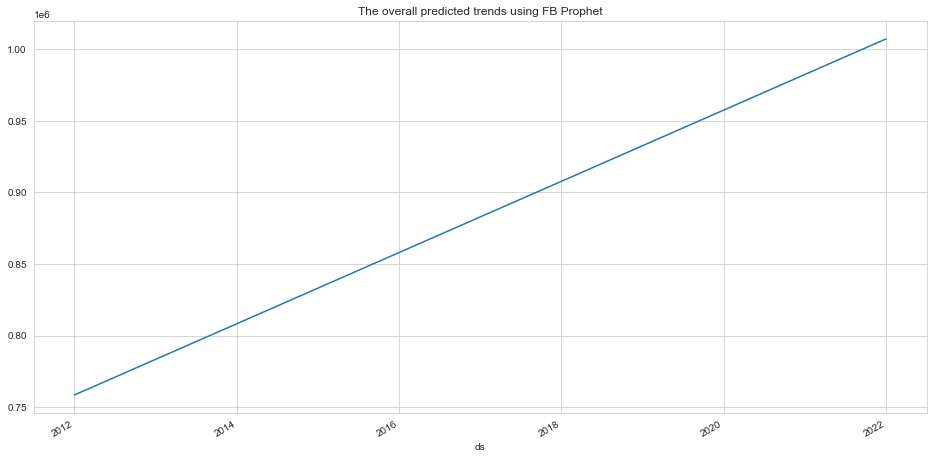

In [103]:
# for the actual value and the predicted value and the forecast
plt.figure(figsize=(16,8))
fb_prophet_predict3= fb_prophet_predict.copy()
fb_prophet_predict3=fb_prophet_predict3.set_index('ds')
fb_prophet_predict3['trend'].plot()
plt.title("The overall predicted trends using FB Prophet")

In [104]:
data_arima8=data_arima.copy()
data_arima8=data_arima8.reset_index()
data_arima8['Date']=data_arima8['Date'].astype(str)
data_arima8['Date']=pd.to_datetime(data_arima8['Date'])
data_arima8=data_arima8.set_index('Date')

In [105]:
data_arima8

,Sale (Dollars)
Date,
2012-01-01,603858.78
2012-02-01,532478.02
2012-03-01,538085.02
2012-04-01,710220.14
2012-05-01,921941.28
...,...
2020-05-01,1210043.70
2020-06-01,1292768.42
2020-07-01,1529956.41


Text(0.5, 1.0, 'FB Prophet Actual vs Forecast')

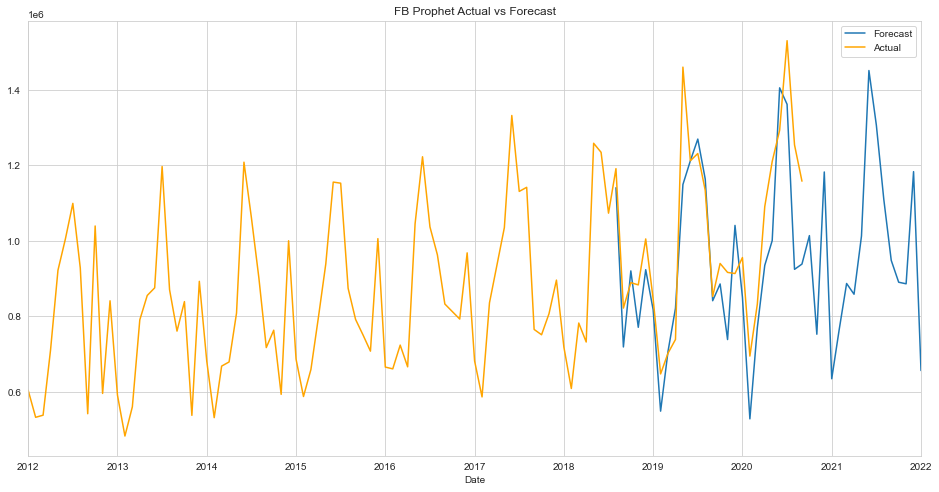

In [106]:
plt.figure(figsize=(16,8))
fb_prophet_predict2['yhat'][77::].plot(label="Forecast")

data_arima8["Sale (Dollars)"].plot(c='orange',label="Actual")
plt.legend()
plt.title("FB Prophet Actual vs Forecast")

In [107]:
###### from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test['y'], fbprophet_slice),2))
print(round(mean_squared_error(test['y'], fbprophet_slice), 2))
print(round(np.sqrt(mean_squared_error(test['y'], fbprophet_slice)), 2))

110473.41
19588716071.92
139959.69


## Different Brand Evaluation

### Dickinson

In [108]:
county_number_30

,County Number,Sale (Dollars)
Date,,
2012-01,30.0,261918.418025
2012-02,30.0,151340.726001
2012-03,30.0,160050.163977
2012-04,30.0,223827.270038
2012-05,30.0,457586.492140
...,...,...
2020-05,30.0,474083.702031
2020-06,30.0,525624.368086
2020-07,30.0,684152.287140


In [109]:
county_number_30_2=county_number_30.copy()
county_number_30_2=county_number_30_2.drop(['County Number'],axis=1)
county_number_30_2=county_number_30_2.reset_index()

In [110]:
data_number30_2=county_number_30_2.groupby(["Date"],as_index=False).agg({'Sale (Dollars)':'sum'})
data_number30_2['Date']=pd.to_datetime(county_number_30_2['Date'])

In [111]:
data_number30_2

,Date,Sale (Dollars)
0,2012-01-01,261918.418025
1,2012-02-01,151340.726001
2,2012-03-01,160050.163977
3,2012-04-01,223827.270038
4,2012-05-01,457586.492140
...,...,...
98,2020-05-01,474083.702031
99,2020-06-01,525624.368086
100,2020-07-01,684152.287140
101,2020-08-01,526322.524659


In [112]:
train_number_30= data_number30_2[: int(0.75*len(data_number30_2))]
test_number_30= data_number30_2[int(0.75*len(data_number30_2)):]

In [113]:
train_number_30=train_number_30.reset_index()
train_number_30 = train_number_30.rename(columns = {'Sale (Dollars)' : 'y'})
train_number_30= train_number_30.rename(columns = {'Date' : 'ds'})

test_number_30=test_number_30.reset_index()
test_number_30= test_number_30.rename(columns = {'Sale (Dollars)' : 'y'})
test_number_30= test_number_30.rename(columns = {'Date' : 'ds'})

In [114]:
fb_prophet_model_30 = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 20,
            holidays_prior_scale = 20,
            changepoint_prior_scale = 0.01)

In [115]:
#train the train models
fb_prophet_model_30.fit(train_number_30)

In [116]:
fb_prophet_forecast_number30 = fb_prophet_model_30.make_future_dataframe(periods = 42,freq = "MS")
fb_prophet_forecast_number30

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
114,2021-09-01
115,2021-10-01
116,2021-11-01
117,2021-12-01


In [117]:
fb_prophet_predict_number30=fb_prophet_model_30.predict(fb_prophet_forecast_number30)
fb_prophet_predict_number30

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,285159.710598,208517.919567,265831.628604,285159.710598,285159.710598,-0.169072,-0.169072,-0.169072,0.016290,0.016290,0.016290,-0.185362,-0.185362,-0.185362,0.0,0.0,0.0,236947.242208
1,2012-02-01,285962.385633,118733.601364,176508.594757,285962.385633,285962.385633,-0.479830,-0.479830,-0.479830,0.004791,0.004791,0.004791,-0.484621,-0.484621,-0.484621,0.0,0.0,0.0,148749.088163
2,2012-03-01,286713.275181,129723.122853,190644.875105,286713.275181,286713.275181,-0.440768,-0.440768,-0.440768,-0.065349,-0.065349,-0.065349,-0.375419,-0.375419,-0.375419,0.0,0.0,0.0,160339.360930
3,2012-04-01,287515.950216,199979.207654,254732.069449,287515.950216,287515.950216,-0.211555,-0.211555,-0.211555,0.016290,0.016290,0.016290,-0.227845,-0.227845,-0.227845,0.0,0.0,0.0,226690.597248
4,2012-05-01,288292.732507,425860.327425,483588.109904,288292.732507,288292.732507,0.579572,0.579572,0.579572,0.108096,0.108096,0.108096,0.471476,0.471476,0.471476,0.0,0.0,0.0,455379.090291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,376587.001139,275072.211137,330495.435180,376586.988571,376587.013429,-0.193279,-0.193279,-0.193279,0.004791,0.004791,0.004791,-0.198070,-0.198070,-0.198070,0.0,0.0,0.0,303800.550763
115,2021-10-01,377363.783593,198229.686406,257144.061067,377363.770616,377363.796432,-0.396971,-0.396971,-0.396971,-0.085851,-0.085851,-0.085851,-0.311120,-0.311120,-0.311120,0.0,0.0,0.0,227561.251593
116,2021-11-01,378166.458795,258767.727823,314435.834482,378166.445510,378166.472094,-0.241903,-0.241903,-0.241903,0.104458,0.104458,0.104458,-0.346361,-0.346361,-0.346361,0.0,0.0,0.0,286686.813857
117,2021-12-01,378943.241248,263840.648014,322064.681891,378943.227457,378943.254981,-0.224770,-0.224770,-0.224770,0.004791,0.004791,0.004791,-0.229561,-0.229561,-0.229561,0.0,0.0,0.0,293768.035328


In [118]:
fb_prophet_predict_number30.set_index('ds')['yhat'].tail(13)

ds
2021-01-01    229330.906338
2021-02-01    232196.318857
2021-03-01    280656.688571
2021-04-01    248496.088914
2021-05-01    500644.613078
2021-06-01    672958.317052
2021-07-01    600381.547073
2021-08-01    517784.437291
2021-09-01    303800.550763
2021-10-01    227561.251593
2021-11-01    286686.813857
2021-12-01    293768.035328
2022-01-01    250196.862402
Name: yhat, dtype: float64

Text(0.5, 1.0, 'Total Sales')

<Figure size 1152x576 with 0 Axes>

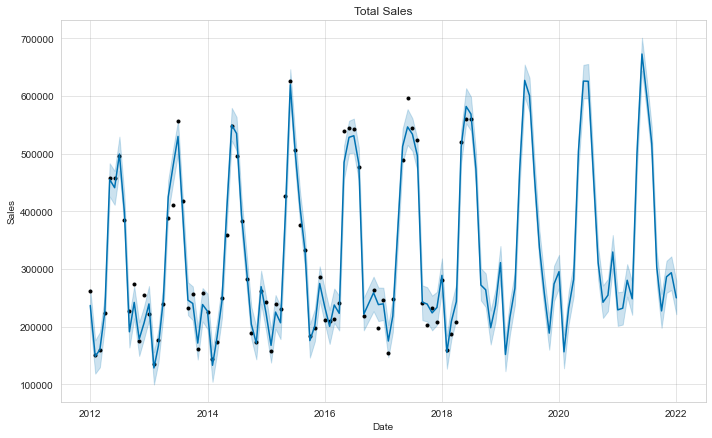

In [119]:
plt.figure(figsize=(16,8))
fb_prophet_model_30.plot(fb_prophet_predict_number30, xlabel = 'Date', ylabel = 'Sales')
plt.title('Total Sales')

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator



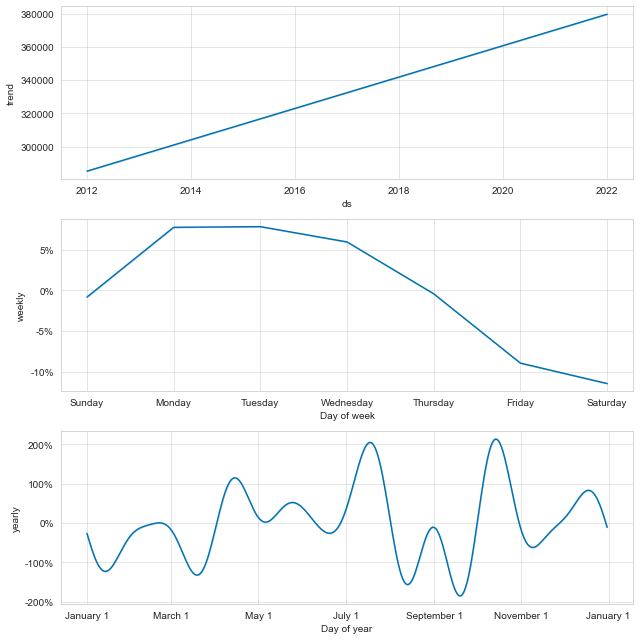

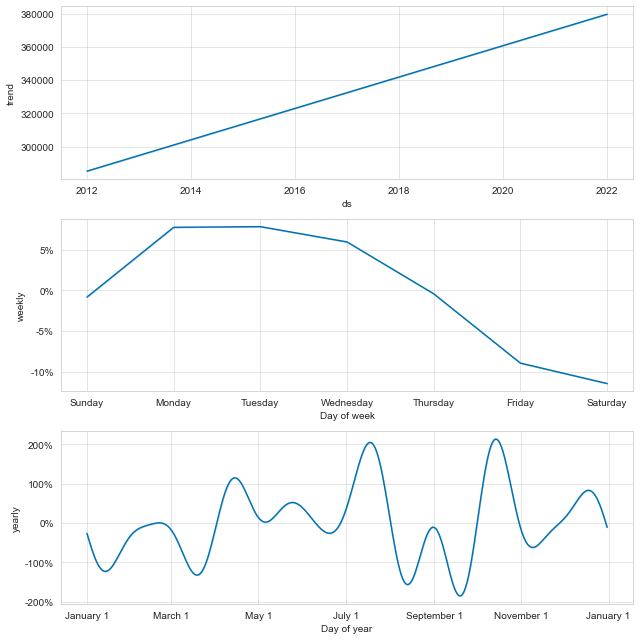

In [120]:
fb_prophet_model.plot_components(fb_prophet_predict_number30)

In [121]:
fb_prophet_predict_number30

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,285159.710598,208517.919567,265831.628604,285159.710598,285159.710598,-0.169072,-0.169072,-0.169072,0.016290,0.016290,0.016290,-0.185362,-0.185362,-0.185362,0.0,0.0,0.0,236947.242208
1,2012-02-01,285962.385633,118733.601364,176508.594757,285962.385633,285962.385633,-0.479830,-0.479830,-0.479830,0.004791,0.004791,0.004791,-0.484621,-0.484621,-0.484621,0.0,0.0,0.0,148749.088163
2,2012-03-01,286713.275181,129723.122853,190644.875105,286713.275181,286713.275181,-0.440768,-0.440768,-0.440768,-0.065349,-0.065349,-0.065349,-0.375419,-0.375419,-0.375419,0.0,0.0,0.0,160339.360930
3,2012-04-01,287515.950216,199979.207654,254732.069449,287515.950216,287515.950216,-0.211555,-0.211555,-0.211555,0.016290,0.016290,0.016290,-0.227845,-0.227845,-0.227845,0.0,0.0,0.0,226690.597248
4,2012-05-01,288292.732507,425860.327425,483588.109904,288292.732507,288292.732507,0.579572,0.579572,0.579572,0.108096,0.108096,0.108096,0.471476,0.471476,0.471476,0.0,0.0,0.0,455379.090291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,376587.001139,275072.211137,330495.435180,376586.988571,376587.013429,-0.193279,-0.193279,-0.193279,0.004791,0.004791,0.004791,-0.198070,-0.198070,-0.198070,0.0,0.0,0.0,303800.550763
115,2021-10-01,377363.783593,198229.686406,257144.061067,377363.770616,377363.796432,-0.396971,-0.396971,-0.396971,-0.085851,-0.085851,-0.085851,-0.311120,-0.311120,-0.311120,0.0,0.0,0.0,227561.251593
116,2021-11-01,378166.458795,258767.727823,314435.834482,378166.445510,378166.472094,-0.241903,-0.241903,-0.241903,0.104458,0.104458,0.104458,-0.346361,-0.346361,-0.346361,0.0,0.0,0.0,286686.813857
117,2021-12-01,378943.241248,263840.648014,322064.681891,378943.227457,378943.254981,-0.224770,-0.224770,-0.224770,0.004791,0.004791,0.004791,-0.229561,-0.229561,-0.229561,0.0,0.0,0.0,293768.035328


In [122]:
fb_prophet_predict_number30_2=fb_prophet_predict_number30.copy()
fb_prophet_predict_number30_2=fb_prophet_predict_number30_2.set_index('ds')
fbprophet_slice_number30=fb_prophet_predict_number30_2[77:103]['yhat']

Text(0.5, 1.0, 'The overall predicted trends using FB Prophet')

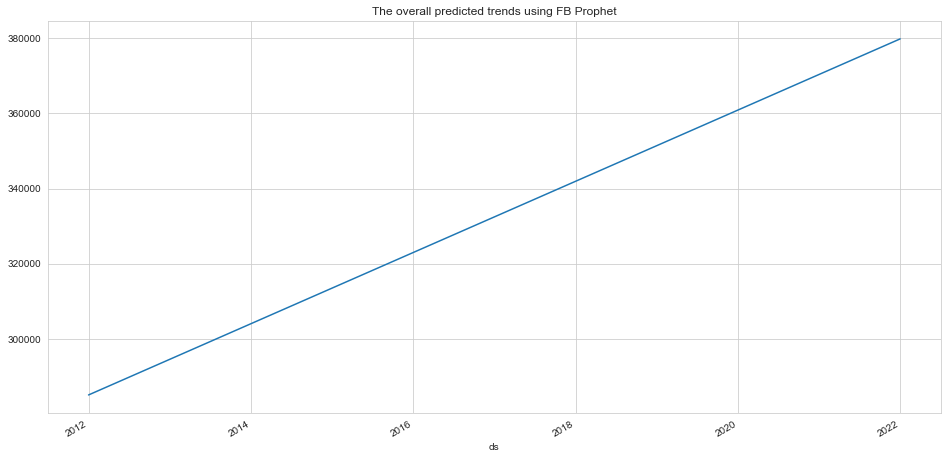

In [123]:
# for the actual value and the predicted value and the forecast
plt.figure(figsize=(16,8))
fb_prophet_predict_number30_3= fb_prophet_predict_number30.copy()
fb_prophet_predict_number30_3=fb_prophet_predict_number30_3.set_index('ds')
fb_prophet_predict_number30_3['trend'].plot()
plt.title("The overall predicted trends using FB Prophet")

In [124]:
county_number_30_2=county_number_30.copy()
county_number_30_2=county_number_30_2.reset_index()
county_number_30_2['Date']=pd.to_datetime(county_number_30_2['Date'])
county_number_30_2=county_number_30_2.set_index('Date')

Text(0.5, 1.0, 'FB Prophet Actual vs Forecast')

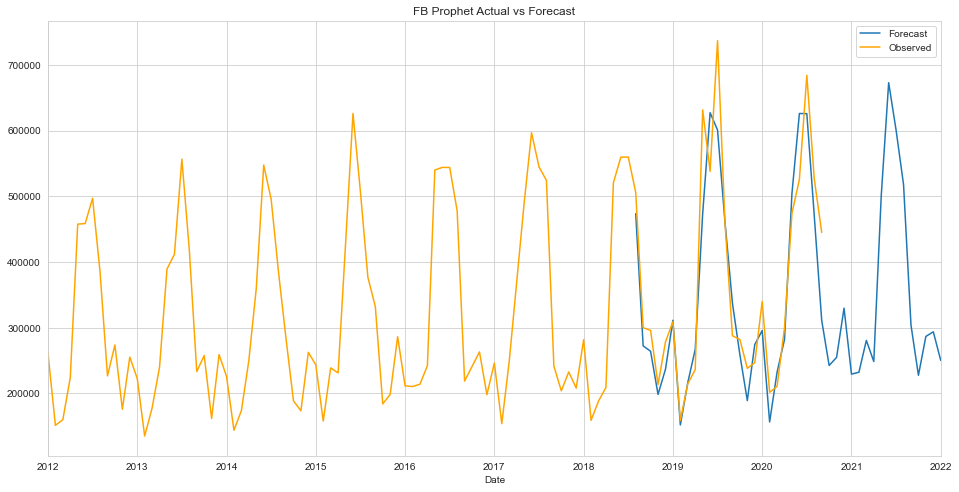

In [125]:
plt.figure(figsize=(16,8))
fb_prophet_predict_number30_2['yhat'][77::].plot(label="Forecast")

county_number_30_2["Sale (Dollars)"].plot(c="orange",label="Observed")
plt.legend()
plt.title("FB Prophet Actual vs Forecast")

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_number_30['y'], fbprophet_slice_number30),2))
print(round(mean_squared_error(test_number_30['y'], fbprophet_slice_number30), 2))
print(round(np.sqrt(mean_squared_error(test_number_30['y'], fbprophet_slice_number30)), 2))

47379.22
3989625541.06
63163.48


### Jefferson

In [127]:
county_number_51

,County Number,Sale (Dollars)
Date,,
2012-01,51.0,37418.637916
2012-02,51.0,49499.971912
2012-03,51.0,38327.143870
2012-04,51.0,64335.274028
2012-05,51.0,66191.501899
...,...,...
2020-05,51.0,110713.422004
2020-06,51.0,100030.085903
2020-07,51.0,115366.145883


In [128]:
county_number_51_2=county_number_51.copy()
county_number_51_2=county_number_51_2.drop(['County Number'],axis=1)
county_number_51_2=county_number_51_2.reset_index()

In [129]:
data_number51_2=county_number_51_2.groupby(["Date"],as_index=False).agg({'Sale (Dollars)':'sum'})
data_number51_2['Date']=pd.to_datetime(county_number_51_2['Date'])

In [130]:
data_number51_2

,Date,Sale (Dollars)
0,2012-01-01,37418.637916
1,2012-02-01,49499.971912
2,2012-03-01,38327.143870
3,2012-04-01,64335.274028
4,2012-05-01,66191.501899
...,...,...
98,2020-05-01,110713.422004
99,2020-06-01,100030.085903
100,2020-07-01,115366.145883
101,2020-08-01,93572.733999


In [131]:
train_number_51= data_number51_2[: int(0.75*len(data_number51_2))]
test_number_51= data_number51_2[int(0.75*len(data_number51_2)):]

In [132]:
train_number_51=train_number_51.reset_index()
train_number_51 = train_number_51.rename(columns = {'Sale (Dollars)' : 'y'})
train_number_51= train_number_51.rename(columns = {'Date' : 'ds'})

test_number_51=test_number_51.reset_index()
test_number_51= test_number_51.rename(columns = {'Sale (Dollars)' : 'y'})
test_number_51= test_number_51.rename(columns = {'Date' : 'ds'})

In [133]:
fb_prophet_model_51 = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 20,
            holidays_prior_scale = 20,
            changepoint_prior_scale = 0.01)

In [134]:
#train the train models
fb_prophet_model_51.fit(train_number_51)

In [135]:
fb_prophet_forecast_number51 = fb_prophet_model_51.make_future_dataframe(periods = 42,freq = "MS")
fb_prophet_forecast_number51

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
114,2021-09-01
115,2021-10-01
116,2021-11-01
117,2021-12-01


In [136]:
fb_prophet_predict_number51=fb_prophet_model_51.predict(fb_prophet_forecast_number51)
fb_prophet_predict_number51

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,57970.355573,39078.882842,61111.129523,57970.355573,57970.355573,-0.136637,-0.136637,-0.136637,0.031102,0.031102,0.031102,-0.167739,-0.167739,-0.167739,0.0,0.0,0.0,50049.464586
1,2012-02-01,58265.992225,36672.368912,58163.164946,58265.992225,58265.992225,-0.180573,-0.180573,-0.180573,0.011229,0.011229,0.011229,-0.191802,-0.191802,-0.191802,0.0,0.0,0.0,47744.723059
2,2012-03-01,58542.555545,39749.297597,60909.122702,58542.555545,58542.555545,-0.141641,-0.141641,-0.141641,0.011592,0.011592,0.011592,-0.153233,-0.153233,-0.153233,0.0,0.0,0.0,50250.529951
3,2012-04-01,58838.192197,44185.961421,65532.566450,58838.192197,58838.192197,-0.066164,-0.066164,-0.066164,0.031102,0.031102,0.031102,-0.097266,-0.097266,-0.097266,0.0,0.0,0.0,54945.201269
4,2012-05-01,59124.292182,47721.920366,69895.889736,59124.292182,59124.292182,-0.012196,-0.012196,-0.012196,-0.061033,-0.061033,-0.061033,0.048838,0.048838,0.048838,0.0,0.0,0.0,58403.240854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,91642.822164,77829.572323,98084.346676,91642.727546,91642.920229,-0.037130,-0.037130,-0.037130,0.011229,0.011229,0.011229,-0.048360,-0.048360,-0.048360,0.0,0.0,0.0,88240.094452
115,2021-10-01,91928.905143,94634.876505,115093.592658,91928.807458,91929.007238,0.143068,0.143068,0.143068,-0.065284,-0.065284,-0.065284,0.208351,0.208351,0.208351,0.0,0.0,0.0,105080.978568
116,2021-11-01,92224.524221,93856.341641,115721.100379,92224.422767,92224.630516,0.133844,0.133844,0.133844,0.203328,0.203328,0.203328,-0.069484,-0.069484,-0.069484,0.0,0.0,0.0,104568.237734
117,2021-12-01,92510.607199,118317.358567,139767.724605,92510.501692,92510.716904,0.394646,0.394646,0.394646,0.011229,0.011229,0.011229,0.383417,0.383417,0.383417,0.0,0.0,0.0,129019.578750


Text(0.5, 1.0, 'Total Sales')

<Figure size 1152x576 with 0 Axes>

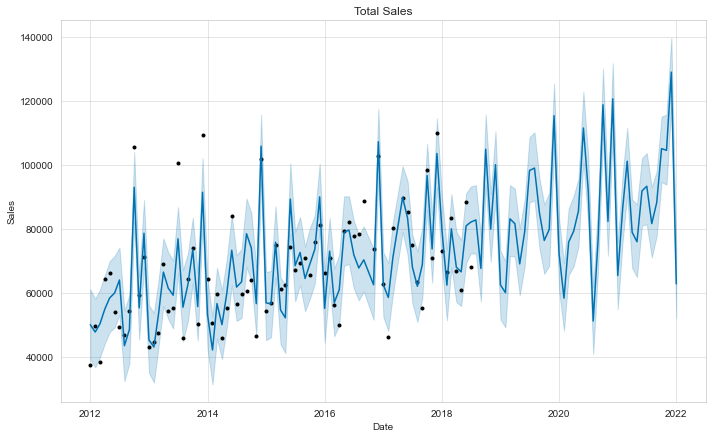

In [137]:
plt.figure(figsize=(16,8))
fb_prophet_model_51.plot(fb_prophet_predict_number51, xlabel = 'Date', ylabel = 'Sales')
plt.title('Total Sales')

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator



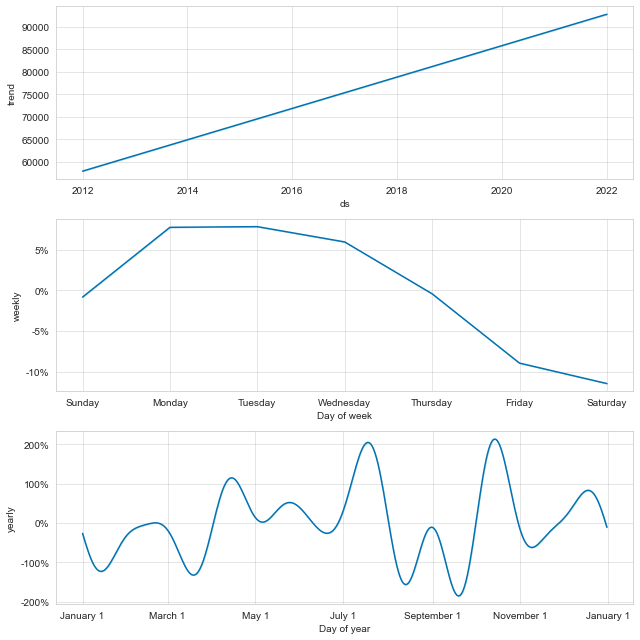

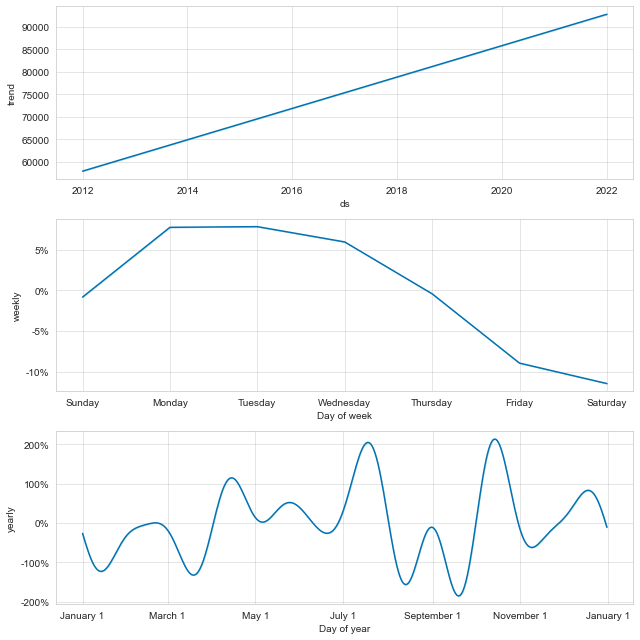

In [138]:
fb_prophet_model.plot_components(fb_prophet_predict_number51)

In [139]:
fb_prophet_predict_number51

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,57970.355573,39078.882842,61111.129523,57970.355573,57970.355573,-0.136637,-0.136637,-0.136637,0.031102,0.031102,0.031102,-0.167739,-0.167739,-0.167739,0.0,0.0,0.0,50049.464586
1,2012-02-01,58265.992225,36672.368912,58163.164946,58265.992225,58265.992225,-0.180573,-0.180573,-0.180573,0.011229,0.011229,0.011229,-0.191802,-0.191802,-0.191802,0.0,0.0,0.0,47744.723059
2,2012-03-01,58542.555545,39749.297597,60909.122702,58542.555545,58542.555545,-0.141641,-0.141641,-0.141641,0.011592,0.011592,0.011592,-0.153233,-0.153233,-0.153233,0.0,0.0,0.0,50250.529951
3,2012-04-01,58838.192197,44185.961421,65532.566450,58838.192197,58838.192197,-0.066164,-0.066164,-0.066164,0.031102,0.031102,0.031102,-0.097266,-0.097266,-0.097266,0.0,0.0,0.0,54945.201269
4,2012-05-01,59124.292182,47721.920366,69895.889736,59124.292182,59124.292182,-0.012196,-0.012196,-0.012196,-0.061033,-0.061033,-0.061033,0.048838,0.048838,0.048838,0.0,0.0,0.0,58403.240854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,91642.822164,77829.572323,98084.346676,91642.727546,91642.920229,-0.037130,-0.037130,-0.037130,0.011229,0.011229,0.011229,-0.048360,-0.048360,-0.048360,0.0,0.0,0.0,88240.094452
115,2021-10-01,91928.905143,94634.876505,115093.592658,91928.807458,91929.007238,0.143068,0.143068,0.143068,-0.065284,-0.065284,-0.065284,0.208351,0.208351,0.208351,0.0,0.0,0.0,105080.978568
116,2021-11-01,92224.524221,93856.341641,115721.100379,92224.422767,92224.630516,0.133844,0.133844,0.133844,0.203328,0.203328,0.203328,-0.069484,-0.069484,-0.069484,0.0,0.0,0.0,104568.237734
117,2021-12-01,92510.607199,118317.358567,139767.724605,92510.501692,92510.716904,0.394646,0.394646,0.394646,0.011229,0.011229,0.011229,0.383417,0.383417,0.383417,0.0,0.0,0.0,129019.578750


In [140]:
fb_prophet_predict_number51_2=fb_prophet_predict_number51.copy()
fb_prophet_predict_number51_2=fb_prophet_predict_number51_2.set_index('ds')
fbprophet_slice_number51=fb_prophet_predict_number51_2[77:103]['yhat']

In [141]:
fb_prophet_predict_number51.set_index('ds')['yhat'].tail(13)

ds
2021-01-01     65411.720017
2021-02-01     86550.510018
2021-03-01    101158.525026
2021-04-01     78909.693925
2021-05-01     75974.581030
2021-06-01     91866.431279
2021-07-01     93331.615783
2021-08-01     81648.135449
2021-09-01     88240.094452
2021-10-01    105080.978568
2021-11-01    104568.237734
2021-12-01    129019.578750
2022-01-01     62824.157797
Name: yhat, dtype: float64

Text(0.5, 1.0, 'The overall predicted trends using FB Prophet')

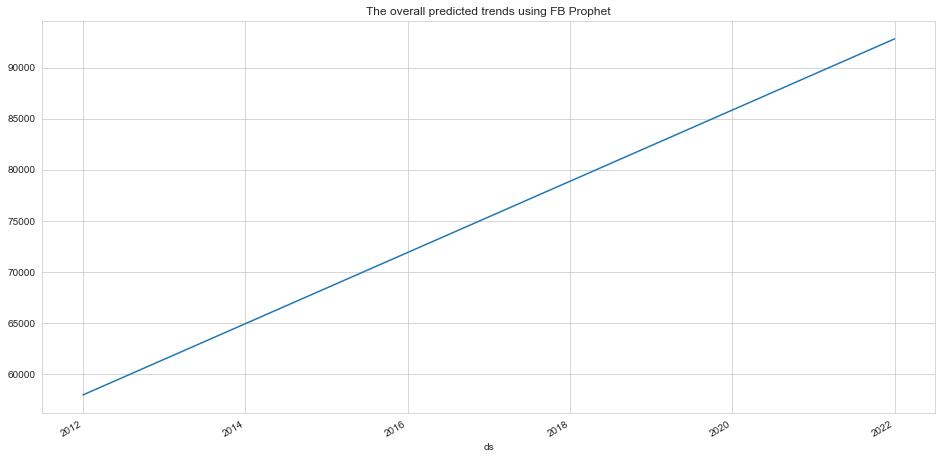

In [142]:
# for the actual value and the predicted value and the forecast
plt.figure(figsize=(16,8))
fb_prophet_predict_number51_3= fb_prophet_predict_number51.copy()
fb_prophet_predict_number51_3=fb_prophet_predict_number51_3.set_index('ds')
fb_prophet_predict_number51_3['trend'].plot()
plt.title("The overall predicted trends using FB Prophet")

In [143]:
county_number_51_2=county_number_51.copy()
county_number_51_2=county_number_51_2.reset_index()
county_number_51_2['Date']=pd.to_datetime(county_number_51_2['Date'])
county_number_51_2=county_number_51_2.set_index('Date')

Text(0.5, 1.0, 'FB Prophet Actual vs Forecast')

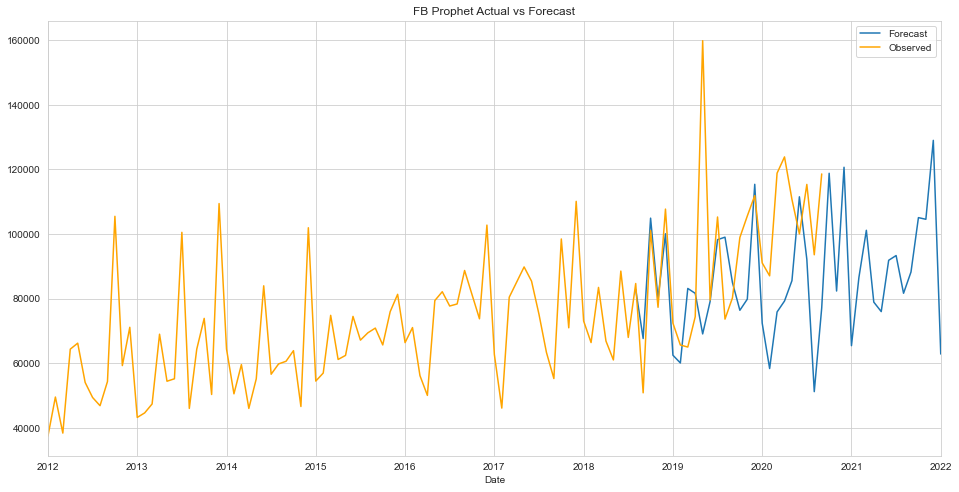

In [144]:
plt.figure(figsize=(16,8))
fb_prophet_predict_number51_2['yhat'][77::].plot(label="Forecast")

county_number_51_2["Sale (Dollars)"].plot(c='orange',label="Observed")
plt.legend()
plt.title("FB Prophet Actual vs Forecast")

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_number_51['y'], fbprophet_slice_number51),2))
print(round(mean_squared_error(test_number_51['y'], fbprophet_slice_number51), 2))
print(round(np.sqrt(mean_squared_error(test_number_51['y'], fbprophet_slice_number51)), 2))

20488.71
802734699.72
28332.57


### Cerro Gordo

In [146]:
county_number_17

,County Number,Sale (Dollars)
Date,,
2012-01,17.0,304521.726057
2012-02,17.0,331637.323537
2012-03,17.0,339707.709136
2012-04,17.0,422057.591403
2012-05,17.0,398163.288035
...,...,...
2020-05,17.0,625246.580287
2020-06,17.0,667113.965216
2020-07,17.0,730437.972338


In [147]:
county_number_17_2=county_number_17.copy()
county_number_17_2=county_number_17_2.drop(['County Number'],axis=1)
county_number_17_2=county_number_17_2.reset_index()

In [148]:
data_number17_2=county_number_17_2.groupby(["Date"],as_index=False).agg({'Sale (Dollars)':'sum'})
data_number17_2['Date']=pd.to_datetime(county_number_17_2['Date'])

In [149]:
data_number17_2

,Date,Sale (Dollars)
0,2012-01-01,304521.726057
1,2012-02-01,331637.323537
2,2012-03-01,339707.709136
3,2012-04-01,422057.591403
4,2012-05-01,398163.288035
...,...,...
98,2020-05-01,625246.580287
99,2020-06-01,667113.965216
100,2020-07-01,730437.972338
101,2020-08-01,634100.282514


In [150]:
train_number_17= data_number17_2[: int(0.75*len(data_number17_2))]
test_number_17= data_number17_2[int(0.75*len(data_number17_2)):]

In [151]:
train_number_17=train_number_17.reset_index()
train_number_17 = train_number_17.rename(columns = {'Sale (Dollars)' : 'y'})
train_number_17= train_number_17.rename(columns = {'Date' : 'ds'})

test_number_17=test_number_17.reset_index()
test_number_17= test_number_17.rename(columns = {'Sale (Dollars)' : 'y'})
test_number_17= test_number_17.rename(columns = {'Date' : 'ds'})

In [152]:
fb_prophet_model_17 = Prophet(growth = "linear",
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            seasonality_mode = "multiplicative",
            seasonality_prior_scale = 20,
            holidays_prior_scale = 20,
            changepoint_prior_scale = 0.01)

In [153]:
#train the train models
fb_prophet_model_17.fit(train_number_17)

In [154]:
fb_prophet_forecast_number17 = fb_prophet_model_17.make_future_dataframe(periods = 42,freq = "MS")
fb_prophet_forecast_number17

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
114,2021-09-01
115,2021-10-01
116,2021-11-01
117,2021-12-01


In [155]:
fb_prophet_predict_number17=fb_prophet_model_17.predict(fb_prophet_forecast_number17)
fb_prophet_predict_number17

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,412016.598121,276017.947625,399109.454840,412016.598121,412016.598121,-0.190851,-0.190851,-0.190851,-0.030837,-0.030837,-0.030837,-0.160015,-0.160015,-0.160015,0.0,0.0,0.0,333382.685967
1,2012-02-01,413126.452154,292064.885157,412844.460177,413126.452154,413126.452154,-0.146264,-0.146264,-0.146264,0.105694,0.105694,0.105694,-0.251958,-0.251958,-0.251958,0.0,0.0,0.0,352701.041013
2,2012-03-01,414164.702700,344596.036294,466089.238245,414164.702700,414164.702700,-0.033034,-0.033034,-0.033034,0.035095,0.035095,0.035095,-0.068129,-0.068129,-0.068129,0.0,0.0,0.0,400483.006341
3,2012-04-01,415274.556734,343459.804107,466980.528055,415274.556734,415274.556734,-0.022867,-0.022867,-0.022867,-0.030837,-0.030837,-0.030837,0.007969,0.007969,0.007969,0.0,0.0,0.0,405778.287257
4,2012-05-01,416348.609024,341845.229308,465288.759548,416348.609024,416348.609024,-0.026379,-0.026379,-0.026379,0.079325,0.079325,0.079325,-0.105703,-0.105703,-0.105703,0.0,0.0,0.0,405365.899736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,538432.552876,502422.370669,625470.706193,538432.540580,538432.564368,0.045117,0.045117,0.045117,0.105694,0.105694,0.105694,-0.060577,-0.060577,-0.060577,0.0,0.0,0.0,562724.859747
115,2021-10-01,539506.605169,502726.197753,624450.290361,539506.592651,539506.617213,0.049191,0.049191,0.049191,-0.096988,-0.096988,-0.096988,0.146179,0.146179,0.146179,0.0,0.0,0.0,566045.483148
116,2021-11-01,540616.459204,447089.635910,564084.113180,540616.446440,540616.471757,-0.068706,-0.068706,-0.068706,0.040286,0.040286,0.040286,-0.108992,-0.108992,-0.108992,0.0,0.0,0.0,503472.932304
117,2021-12-01,541690.511496,709457.536433,830683.028406,541690.498308,541690.524258,0.421581,0.421581,0.421581,0.105694,0.105694,0.105694,0.315887,0.315887,0.315887,0.0,0.0,0.0,770057.054543


Text(0.5, 1.0, 'Total Sales')

<Figure size 1152x576 with 0 Axes>

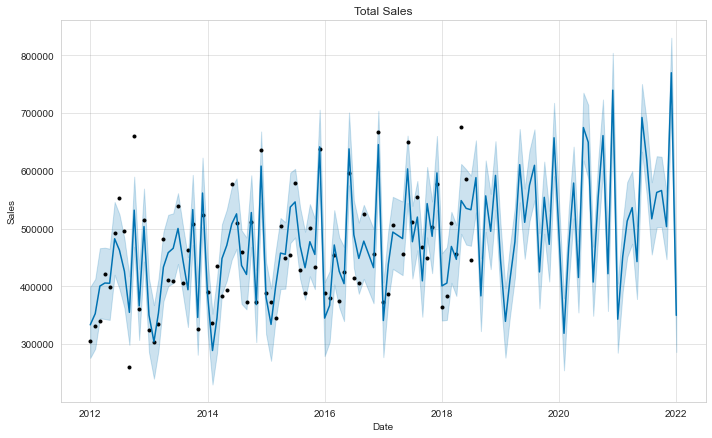

In [156]:
plt.figure(figsize=(16,8))
fb_prophet_model_17.plot(fb_prophet_predict_number17, xlabel = 'Date', ylabel = 'Sales')
plt.title('Total Sales')

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:413: UserWarning:

FixedFormatter should only be used together with FixedLocator



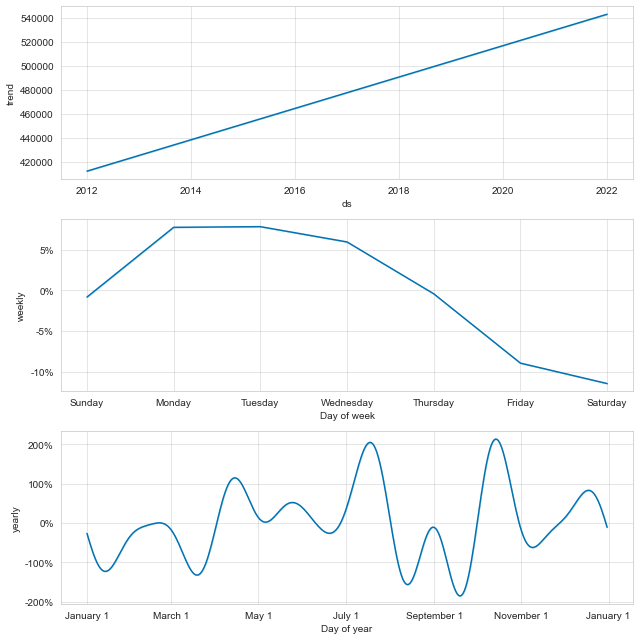

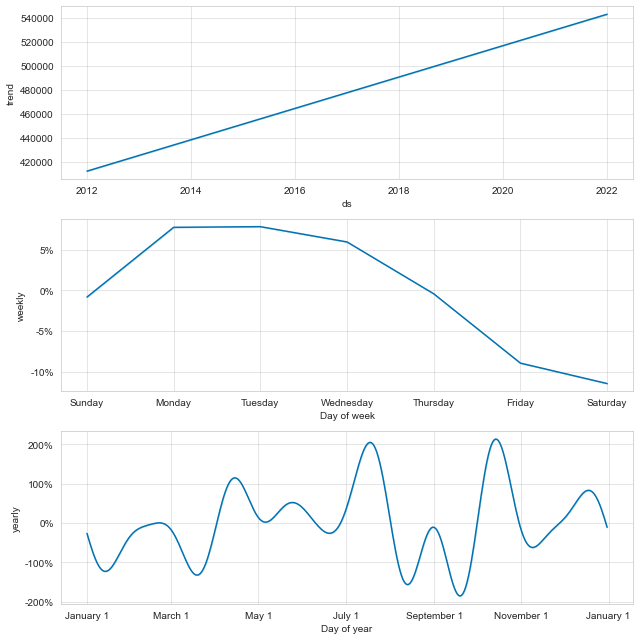

In [157]:
fb_prophet_model.plot_components(fb_prophet_predict_number17)

In [158]:
fb_prophet_predict_number17

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-01-01,412016.598121,276017.947625,399109.454840,412016.598121,412016.598121,-0.190851,-0.190851,-0.190851,-0.030837,-0.030837,-0.030837,-0.160015,-0.160015,-0.160015,0.0,0.0,0.0,333382.685967
1,2012-02-01,413126.452154,292064.885157,412844.460177,413126.452154,413126.452154,-0.146264,-0.146264,-0.146264,0.105694,0.105694,0.105694,-0.251958,-0.251958,-0.251958,0.0,0.0,0.0,352701.041013
2,2012-03-01,414164.702700,344596.036294,466089.238245,414164.702700,414164.702700,-0.033034,-0.033034,-0.033034,0.035095,0.035095,0.035095,-0.068129,-0.068129,-0.068129,0.0,0.0,0.0,400483.006341
3,2012-04-01,415274.556734,343459.804107,466980.528055,415274.556734,415274.556734,-0.022867,-0.022867,-0.022867,-0.030837,-0.030837,-0.030837,0.007969,0.007969,0.007969,0.0,0.0,0.0,405778.287257
4,2012-05-01,416348.609024,341845.229308,465288.759548,416348.609024,416348.609024,-0.026379,-0.026379,-0.026379,0.079325,0.079325,0.079325,-0.105703,-0.105703,-0.105703,0.0,0.0,0.0,405365.899736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2021-09-01,538432.552876,502422.370669,625470.706193,538432.540580,538432.564368,0.045117,0.045117,0.045117,0.105694,0.105694,0.105694,-0.060577,-0.060577,-0.060577,0.0,0.0,0.0,562724.859747
115,2021-10-01,539506.605169,502726.197753,624450.290361,539506.592651,539506.617213,0.049191,0.049191,0.049191,-0.096988,-0.096988,-0.096988,0.146179,0.146179,0.146179,0.0,0.0,0.0,566045.483148
116,2021-11-01,540616.459204,447089.635910,564084.113180,540616.446440,540616.471757,-0.068706,-0.068706,-0.068706,0.040286,0.040286,0.040286,-0.108992,-0.108992,-0.108992,0.0,0.0,0.0,503472.932304
117,2021-12-01,541690.511496,709457.536433,830683.028406,541690.498308,541690.524258,0.421581,0.421581,0.421581,0.105694,0.105694,0.105694,0.315887,0.315887,0.315887,0.0,0.0,0.0,770057.054543


In [159]:
fb_prophet_predict_number17.set_index('ds')['yhat'].tail(13)

ds
2021-01-01    343148.945331
2021-02-01    451502.872930
2021-03-01    513170.149145
2021-04-01    536423.758819
2021-05-01    442848.405851
2021-06-01    692574.826916
2021-07-01    618812.743384
2021-08-01    516957.628292
2021-09-01    562724.859747
2021-10-01    566045.483148
2021-11-01    503472.932304
2021-12-01    770057.054543
2022-01-01    349752.123002
Name: yhat, dtype: float64

In [160]:
fb_prophet_predict_number17_2=fb_prophet_predict_number17.copy()
fb_prophet_predict_number17_2=fb_prophet_predict_number17_2.set_index('ds')
fbprophet_slice_number17=fb_prophet_predict_number17_2[77:103]['yhat']

Text(0.5, 1.0, 'The overall predicted trends using FB Prophet')

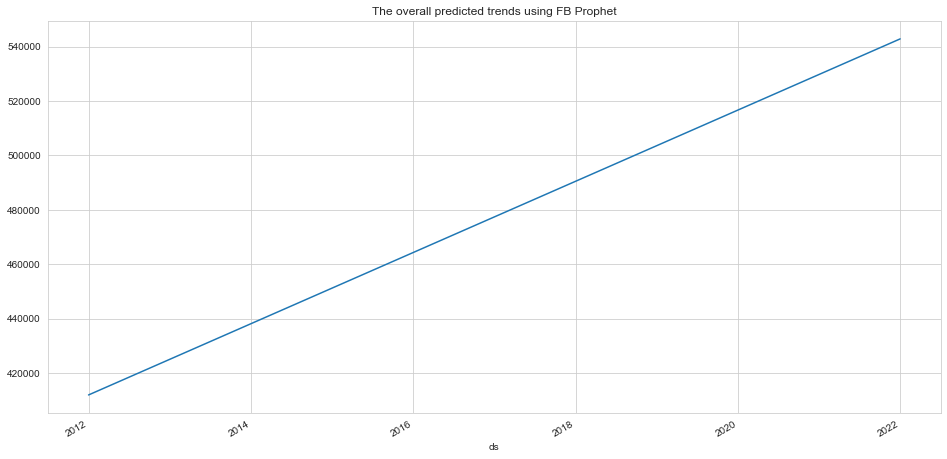

In [161]:
# for the actual value and the predicted value and the forecast
plt.figure(figsize=(16,8))
fb_prophet_predict_number17_3= fb_prophet_predict_number17.copy()
fb_prophet_predict_number17_3=fb_prophet_predict_number17_3.set_index('ds')
fb_prophet_predict_number17_3['trend'].plot()
plt.title("The overall predicted trends using FB Prophet")

In [162]:
county_number_17_2=county_number_17.copy()
county_number_17_2=county_number_17_2.reset_index()
county_number_17_2['Date']=pd.to_datetime(county_number_17_2['Date'])
county_number_17_2=county_number_17_2.set_index('Date')

Text(0.5, 1.0, 'FB Prophet Actual vs Forecast')

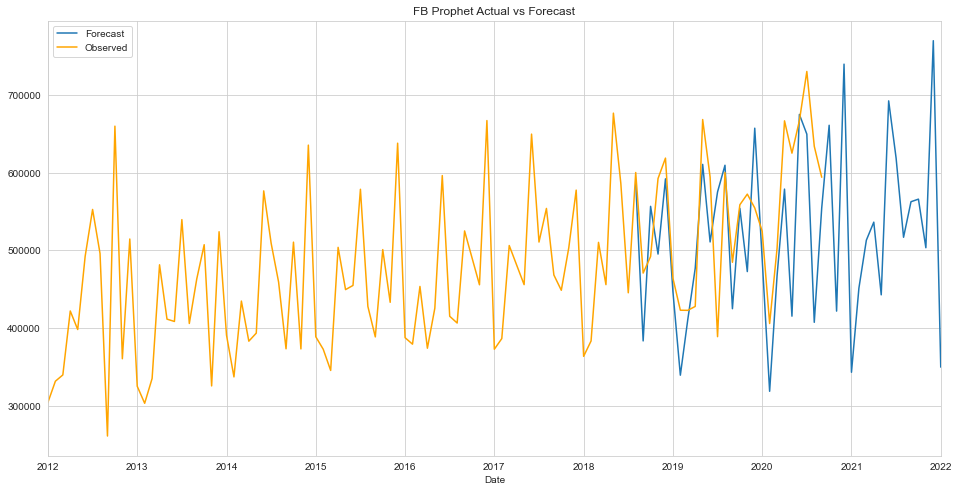

In [163]:
plt.figure(figsize=(16,8))
fb_prophet_predict_number17_2['yhat'][77::].plot(label="Forecast")

county_number_17_2["Sale (Dollars)"].plot(c='orange',label="Observed")
plt.legend()
plt.title("FB Prophet Actual vs Forecast")

In [164]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_number_17['y'], fbprophet_slice_number17),2))
print(round(mean_squared_error(test_number_17['y'], fbprophet_slice_number17), 2))
print(round(np.sqrt(mean_squared_error(test_number_17['y'], fbprophet_slice_number17)), 2))

71722.83
8562582540.07
92534.22
